In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
!python --version

Python 3.12.9


1. Загрузка данных, соединение;
2. Переименование столбцов для удобства обработки;
3. EDA. Проверка на дубликаты. Проверка на выбросы. Подготовка данных, нормализация для каждой задачи;
4. Выбор модели для предсказания признака "Модуль упругости при растяжении, ГПа";
5. Выбор модели для предсказания признака "Прочность при растяжении, МПа";
6. Построение НС для предсказания признака "Соотношение матрица-наполнитель". В архитектуру заложить слой нормализации;
7. Сохранение моделей и предобработчиков для дальнейшего применения в web-приложении.

Требуется:<br>
1.	Изучить теоретические основы и методы решения поставленной задачи. <br>
2.	Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.<br>
3.	Провести предобработку данных (удаление шумов, нормализация и т.д.).<br>
4.	Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.<br>
5.	Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. <br>
6.	Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).<br>
7.	Оценить точность модели на тренировочном и тестовом датасете. <br>
8.	Создать репозиторий в GitHub / GitLab и разместить там код исследования. Оформить файл README.


In [3]:
X_bp = pd.read_excel('data/X_bp.xlsx', index_col=0)
X_nup = pd.read_excel('data/X_nup.xlsx', index_col=0)

In [4]:
data = X_bp.join(X_nup)

In [5]:
data

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

Переименование столбцов по первым буквам названий признаков для более удобной дальнейшей обработки

In [6]:
data.columns = [''.join(map(lambda x: x[0].upper(), i.split(',')[0].split(' '))) for i in data.columns]

In [7]:
data

СМ            П          МУ          КО        СЭГ          ТВ  \
0     1.857143  2030.000000  738.736842   30.000000  22.267857  100.000000   
1     1.857143  2030.000000  738.736842   50.000000  23.750000  284.615385   
2     1.857143  2030.000000  738.736842   49.900000  33.000000  284.615385   
3     1.857143  2030.000000  738.736842  129.000000  21.250000  300.000000   
4     2.771331  2030.000000  753.000000  111.860000  22.267857  284.615385   
...        ...          ...         ...         ...        ...         ...   
1018  2.271346  1952.087902  912.855545   86.992183  20.123249  324.774576   
1019  3.444022  2050.089171  444.732634  145.981978  19.599769  254.215401   
1020  3.280604  1972.372865  416.836524  110.533477  23.957502  248.423047   
1021  3.705351  2066.799773  741.475517  141.397963  19.246945  275.779840   
1022  3.808020  1890.413468  417.316232  129.183416  27.474763  300.952708   

              ПП       МУПР          ППР          ПС  УН         ШН         ПН  
0     210.000000  70.000000  3000.000000  220.000000   0   4.000000  57.000000  
1     210.000000  70.000000  3000.000000  220.000000   0   4.000000  60.000000  
2     210.000000  70.000000  3000.000000  220.000000   0   4.000000  70.000000  
3     210.000000  70.000000  3000.000000  220.000000   0   5.000000  47.000000  
4     210.000000  70.000000  3000.000000  220.000000   0   5.000000  57.000000  
...          ...        ...          ...         ...  ..        ...        ...  
1018  209.198700  73.090961  2387.292495  125.007669  90   9.076380  47.019770  
1019  350.660830  72.920827  2360.392784  117.730099  90  10.565614  53.750790  
1020  740.142791  74.734344  2662.906040  236.606764  90   4.161154  67.629684  
1021  641.468152  74.042708  2071.715856  197.126067  90   6.313201  58.261074  
1022  758.747882  74.309704  2856.328932  194.754342  90   6.078902  77.434468  

[1023 rows x 13 columns]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   СМ      1023 non-null   float64
 1   П       1023 non-null   float64
 2   МУ      1023 non-null   float64
 3   КО      1023 non-null   float64
 4   СЭГ     1023 non-null   float64
 5   ТВ      1023 non-null   float64
 6   ПП      1023 non-null   float64
 7   МУПР    1023 non-null   float64
 8   ППР     1023 non-null   float64
 9   ПС      1023 non-null   float64
 10  УН      1023 non-null   int64  
 11  ШН      1023 non-null   float64
 12  ПН      1023 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 111.9 KB


In [22]:
data.describe()

СМ            П           МУ           КО          СЭГ  \
count  1023.000000  1023.000000  1023.000000  1023.000000  1023.000000   
mean      2.930366  1975.734888   739.923233   110.570769    22.244390   
std       0.913222    73.729231   330.231581    28.295911     2.406301   
min       0.389403  1731.764635     2.436909    17.740275    14.254985   
25%       2.317887  1924.155467   500.047452    92.443497    20.608034   
50%       2.906878  1977.621657   739.664328   110.564840    22.230744   
75%       3.552660  2021.374375   961.812526   129.730366    23.961934   
max       5.591742  2207.773481  1911.536477   198.953207    33.000000   

                ТВ           ПП         МУПР          ППР           ПС  \
count  1023.000000  1023.000000  1023.000000  1023.000000  1023.000000   
mean    285.882151   482.731833    73.328571  2466.922843   218.423144   
std      40.943260   281.314690     3.118983   485.628006    59.735931   
min     100.000000     0.603740    64.054061  1036.856605    33.803026   
25%     259.066528   266.816645    71.245018  2135.850448   179.627520   
50%     285.896812   451.864365    73.268805  2459.524526   219.198882   
75%     313.002106   693.225017    75.356612  2767.193119   257.481724   
max     413.273418  1399.542362    82.682051  3848.436732   414.590628   

                УН           ШН           ПН  
count  1023.000000  1023.000000  1023.000000  
mean     44.252199     6.899222    57.153929  
std      45.015793     2.563467    12.350969  
min       0.000000     0.000000     0.000000  
25%       0.000000     5.080033    49.799212  
50%       0.000000     6.916144    57.341920  
75%      90.000000     8.586293    64.944961  
max      90.000000    14.440522   103.988901

In [8]:
data.isna().sum().sum()

np.int64(0)

In [9]:
data.duplicated().sum()

np.int64(0)

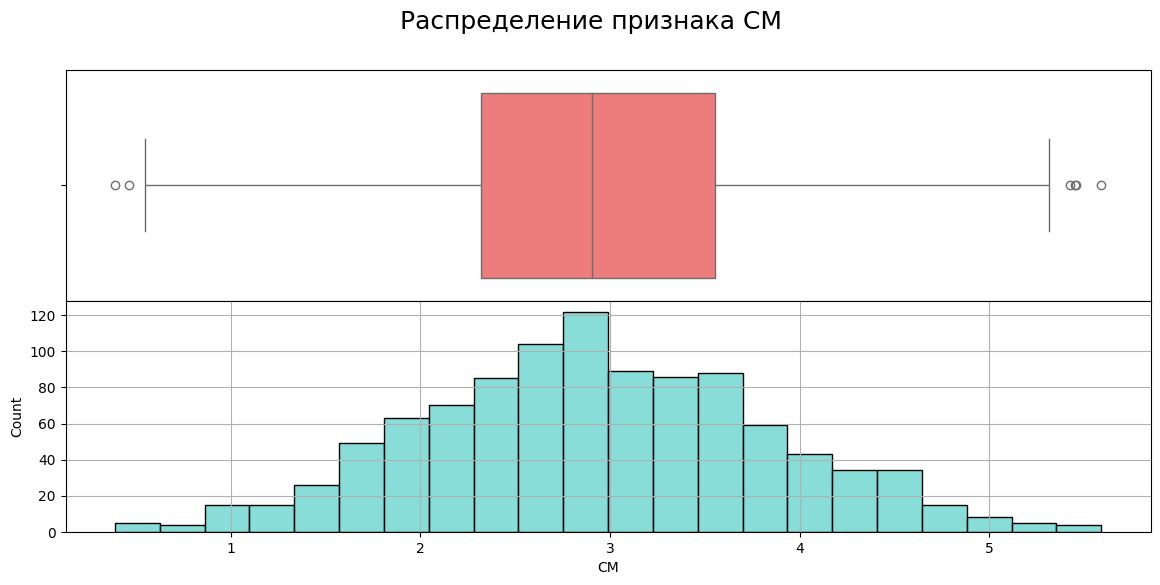

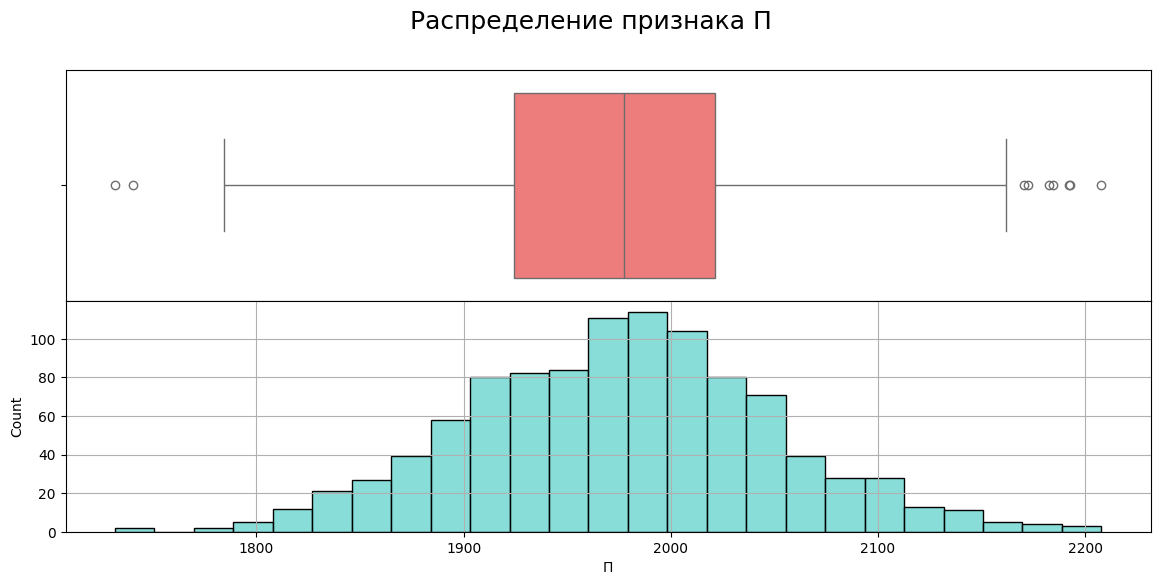

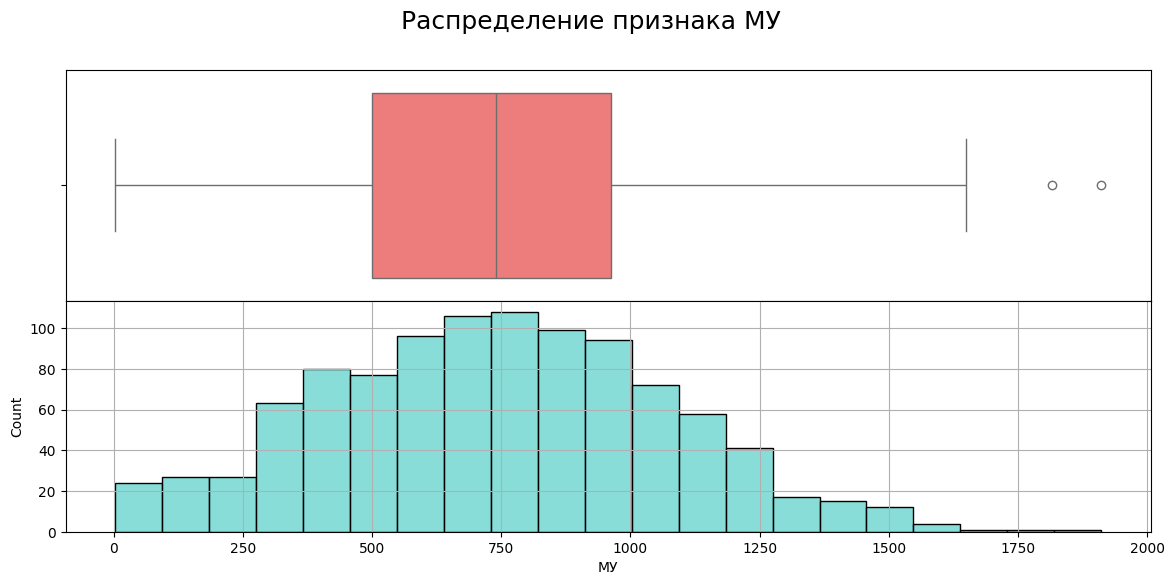

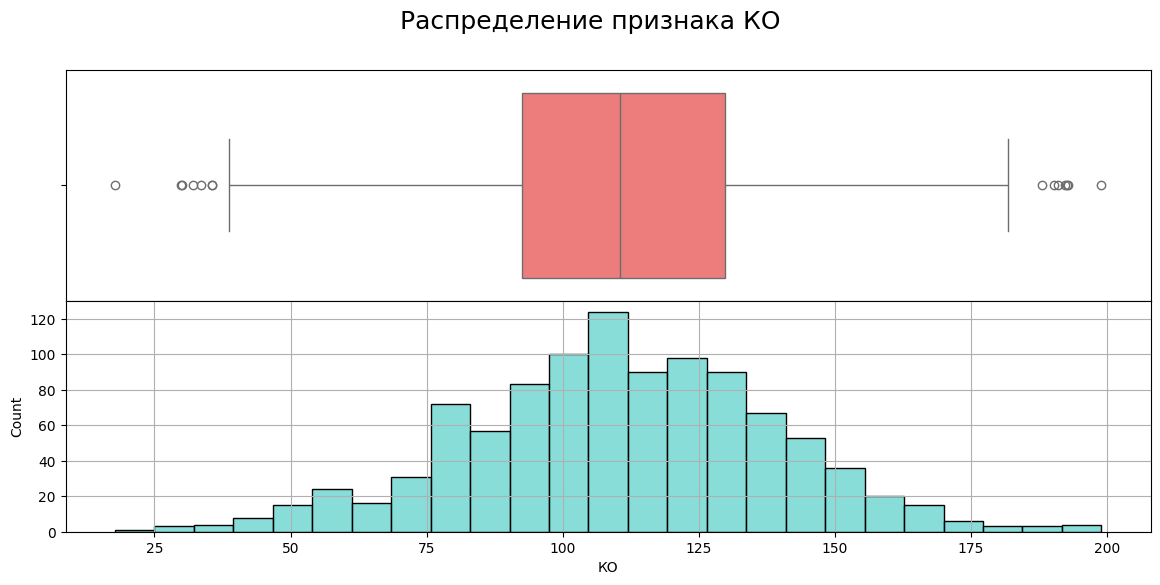

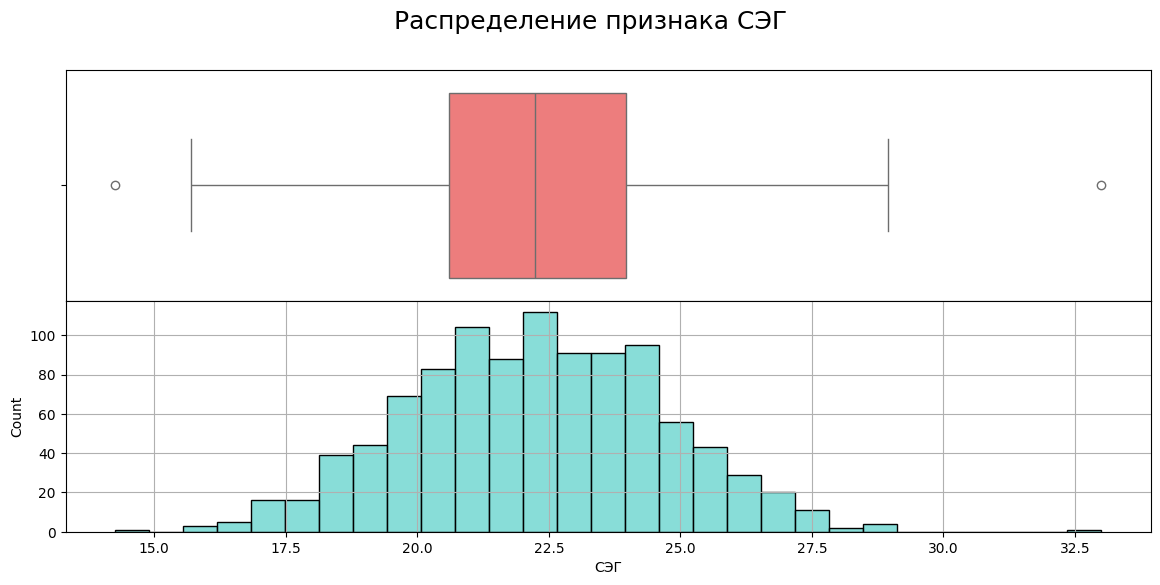

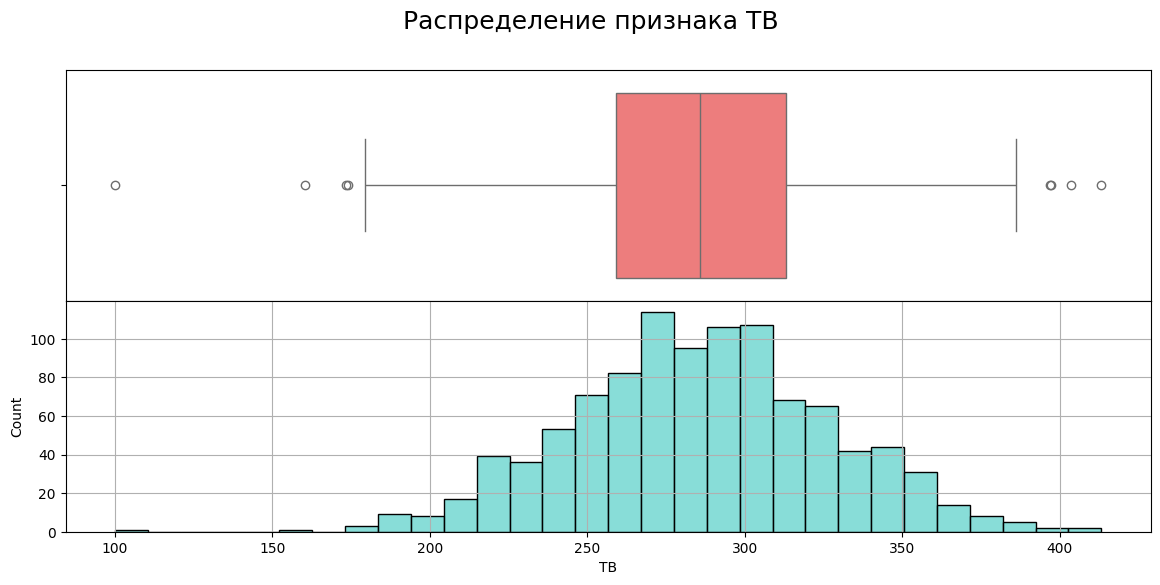

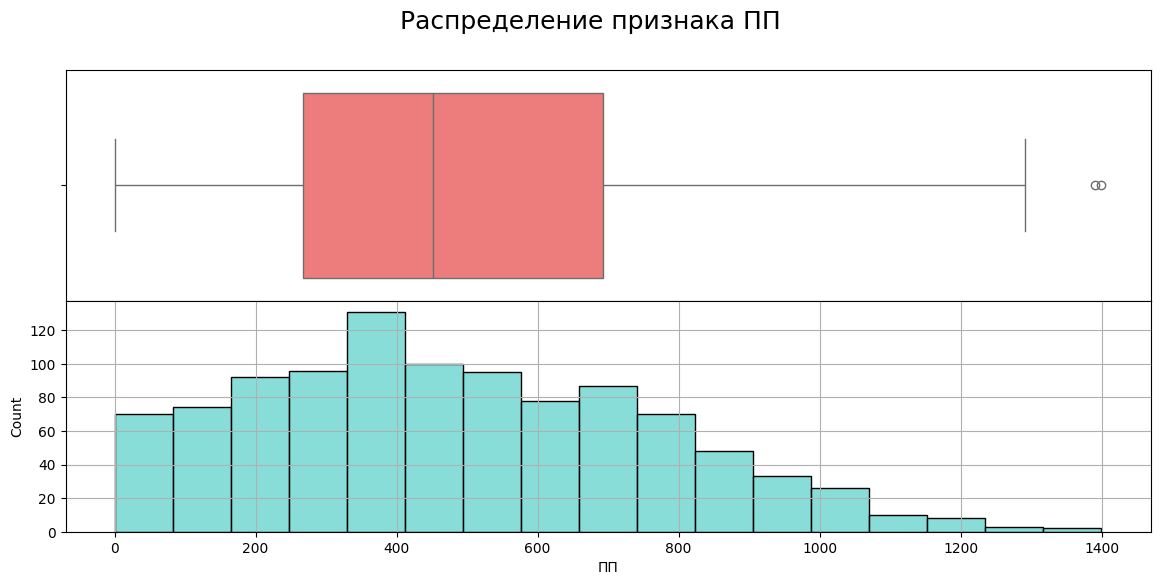

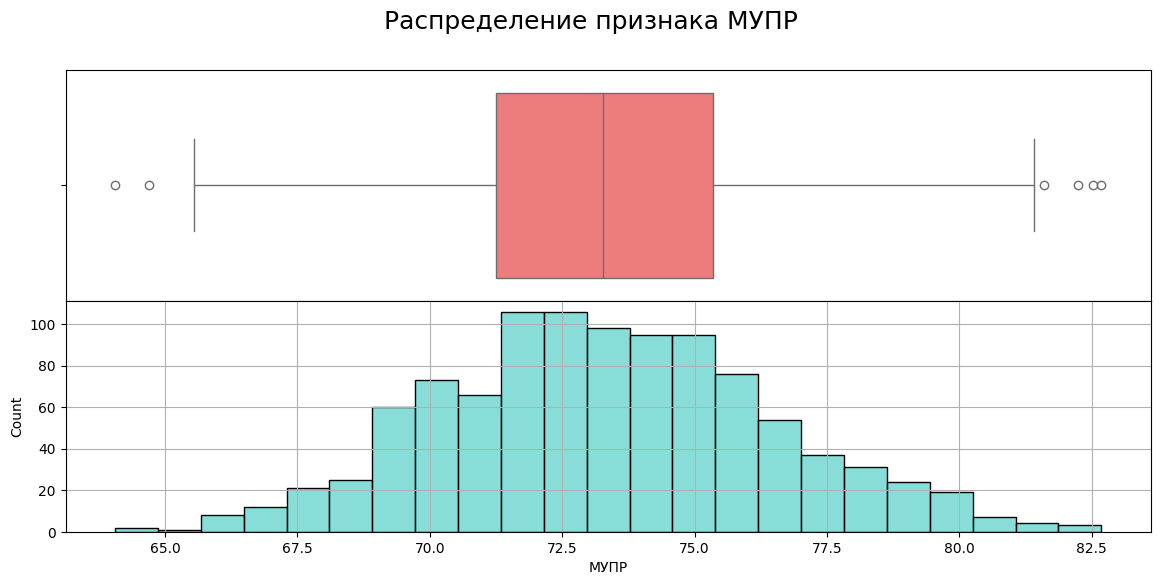

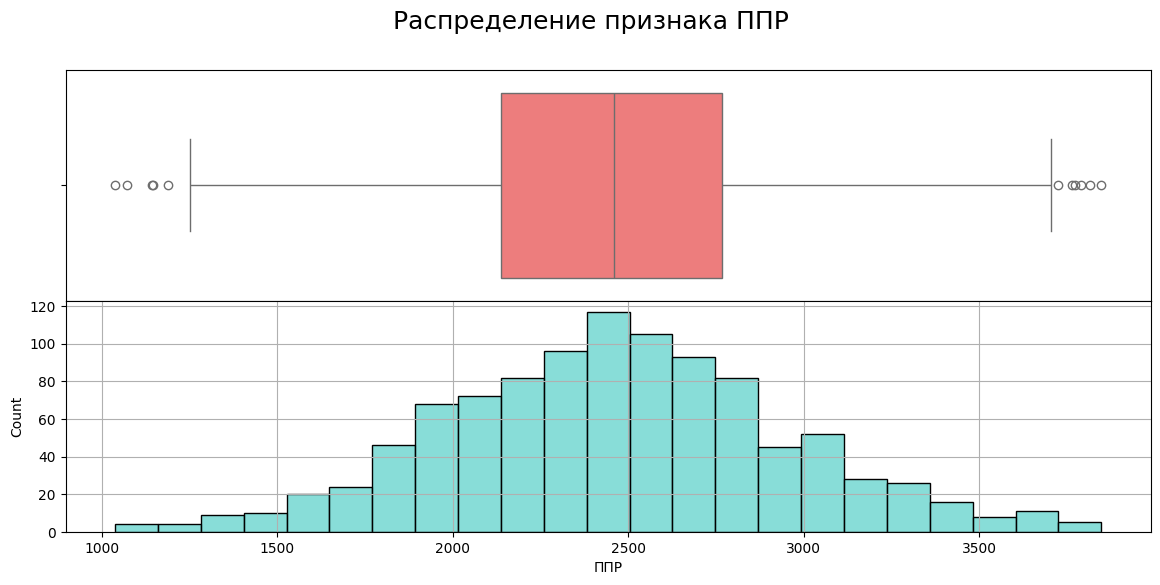

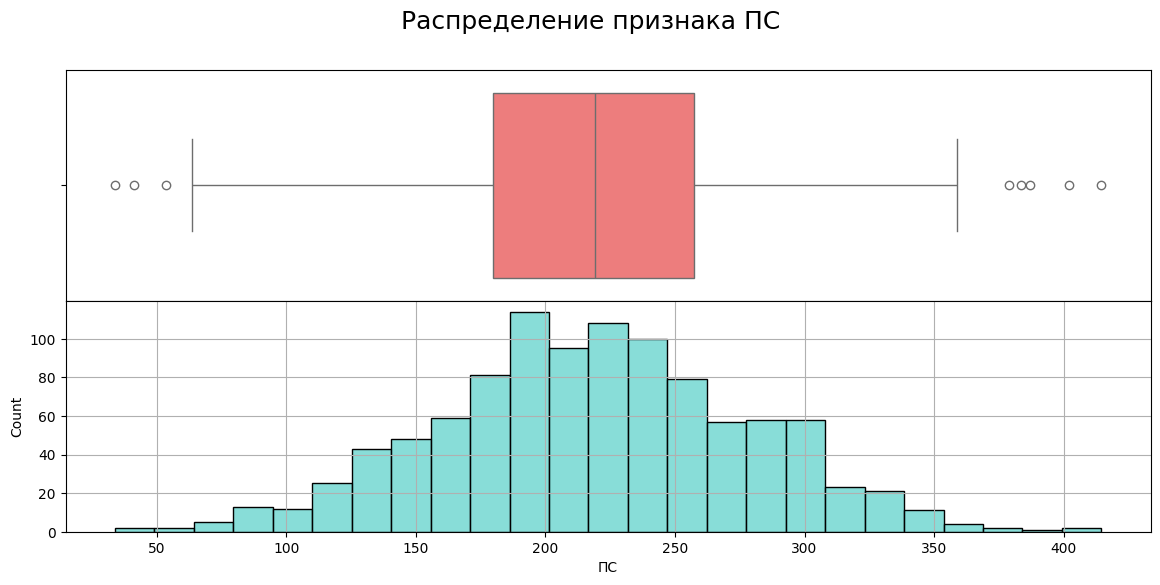

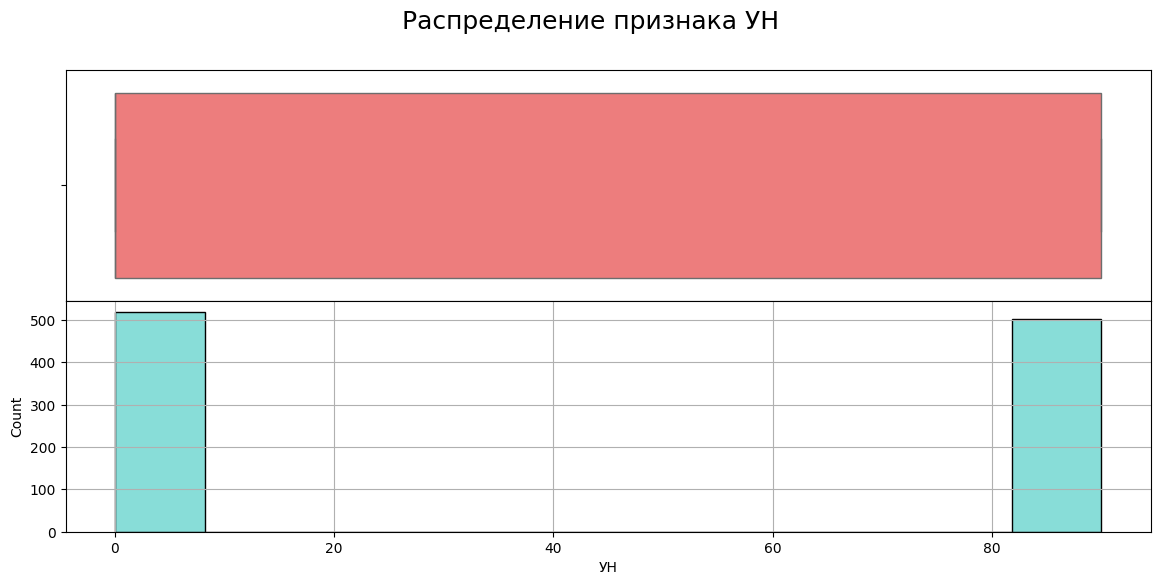

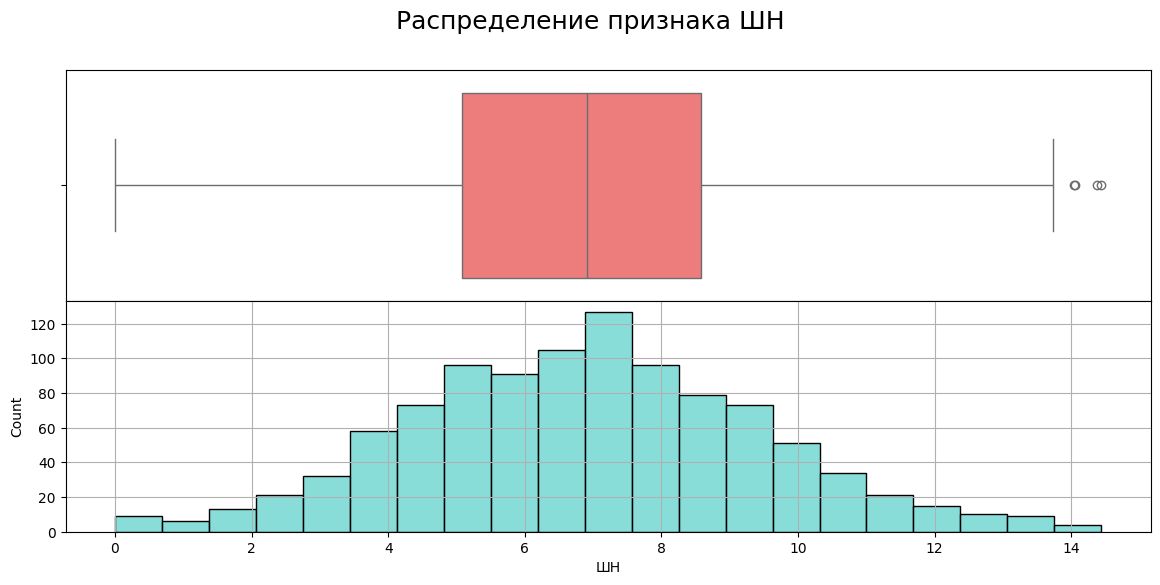

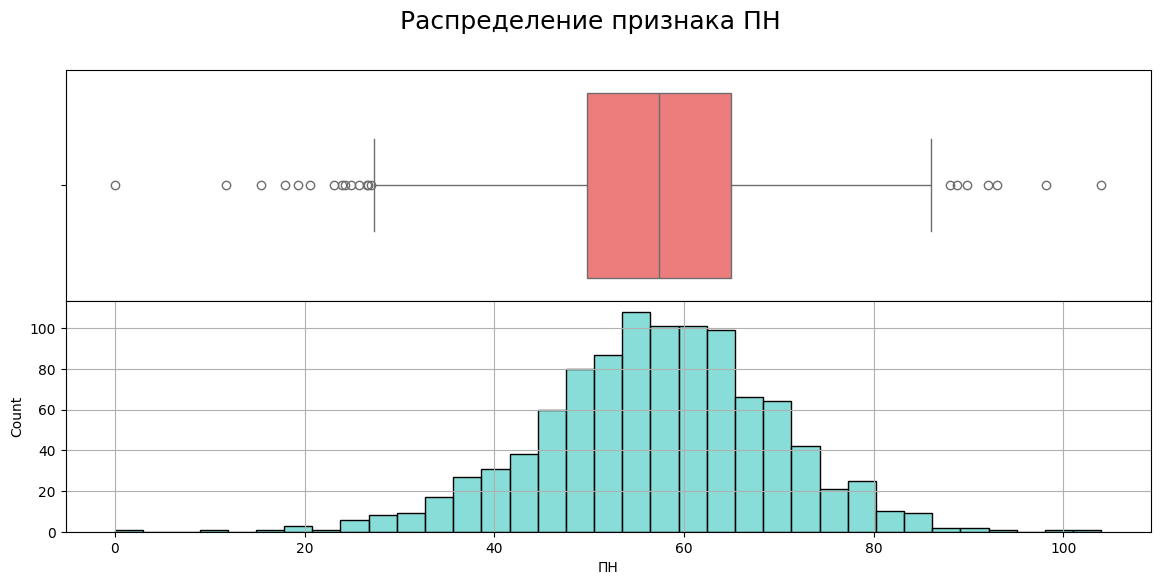

In [10]:
def DistributionPlot(df: pd.DataFrame, column: str, color: list):
    fig, axes = plt.subplots(nrows = 2, ncols=1, figsize=(14,6))
    sns.boxplot(data=df, x=column, ax=axes[0], color=color[0])
    axes[0].set_xlabel(None)
    axes[0].get_xaxis().set_ticks([])
    sns.histplot(data=df, x=column, ax=axes[1], color=color[1])
    plt.subplots_adjust(hspace=0)
    plt.suptitle(f'Распределение признака {column}', fontsize=18)
    plt.grid()
    fig.savefig(f"plots/{column}.png", dpi=fig.dpi)
    print()

for col in data.columns:
    DistributionPlot(data, col, ['#FF6B6B', '#60D2CB'])
    
    

<h1>Работа с выбросами</h1>

In [26]:
for col in data.columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    data.loc[data[col] < q1 - 1.5 * iqr,col] = np.nan
    data.loc[data[col] > q3 + 1.5 * iqr,col] = np.nan
    

In [27]:
pd.DataFrame(data.isna().mean().rename('Outliers percentage')).apply(lambda x: 100 * x)

Outliers percentage
СМ               0.586510
П                0.879765
МУ               0.195503
КО               1.368524
СЭГ              0.195503
ТВ               0.782014
ПП               0.195503
МУПР             0.586510
ППР              1.075269
ПС               0.782014
УН               0.000000
ШН               0.391007
ПН               2.052786

In [28]:
data = data.dropna()

In [29]:
data

СМ            П          МУ          КО        СЭГ          ТВ  \
1     1.857143  2030.000000  738.736842   50.000000  23.750000  284.615385   
3     1.857143  2030.000000  738.736842  129.000000  21.250000  300.000000   
4     2.771331  2030.000000  753.000000  111.860000  22.267857  284.615385   
5     2.767918  2000.000000  748.000000  111.860000  22.267857  284.615385   
6     2.569620  1910.000000  807.000000  111.860000  22.267857  284.615385   
...        ...          ...         ...         ...        ...         ...   
1018  2.271346  1952.087902  912.855545   86.992183  20.123249  324.774576   
1019  3.444022  2050.089171  444.732634  145.981978  19.599769  254.215401   
1020  3.280604  1972.372865  416.836524  110.533477  23.957502  248.423047   
1021  3.705351  2066.799773  741.475517  141.397963  19.246945  275.779840   
1022  3.808020  1890.413468  417.316232  129.183416  27.474763  300.952708   

              ПП       МУПР          ППР          ПС    УН         ШН  \
1     210.000000  70.000000  3000.000000  220.000000   0.0   4.000000   
3     210.000000  70.000000  3000.000000  220.000000   0.0   5.000000   
4     210.000000  70.000000  3000.000000  220.000000   0.0   5.000000   
5     210.000000  70.000000  3000.000000  220.000000   0.0   5.000000   
6     210.000000  70.000000  3000.000000  220.000000   0.0   5.000000   
...          ...        ...          ...         ...   ...        ...   
1018  209.198700  73.090961  2387.292495  125.007669  90.0   9.076380   
1019  350.660830  72.920827  2360.392784  117.730099  90.0  10.565614   
1020  740.142791  74.734344  2662.906040  236.606764  90.0   4.161154   
1021  641.468152  74.042708  2071.715856  197.126067  90.0   6.313201   
1022  758.747882  74.309704  2856.328932  194.754342  90.0   6.078902   

             ПН  
1     60.000000  
3     47.000000  
4     57.000000  
5     60.000000  
6     70.000000  
...         ...  
1018  47.019770  
1019  53.750790  
1020  67.629684  
1021  58.261074  
1022  77.434468  

[936 rows x 13 columns]

<h2>Распределение данных после удаления выбросов</h2>

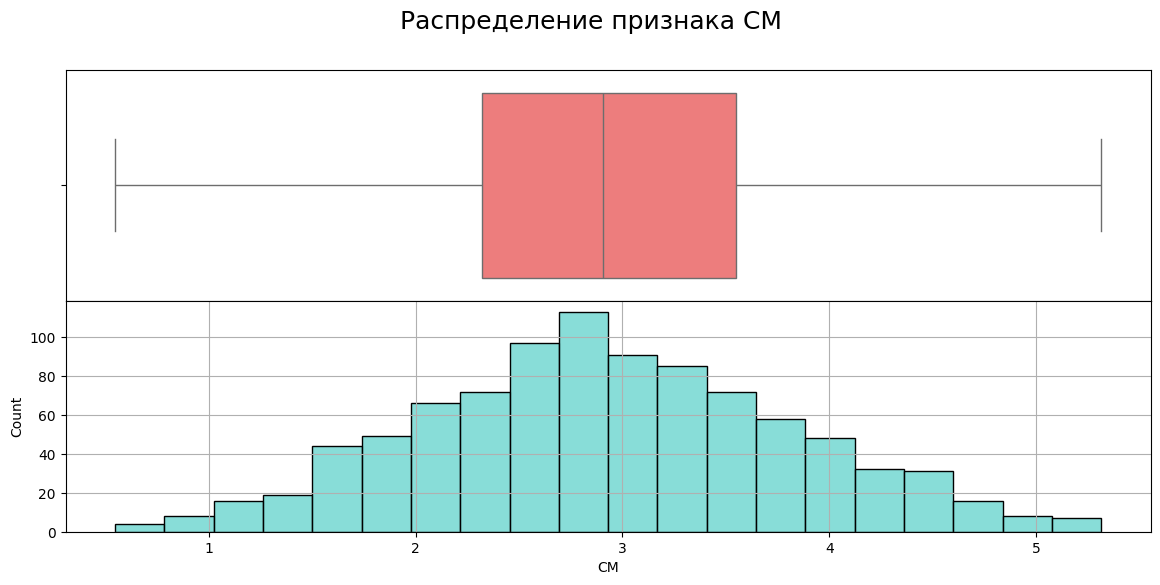

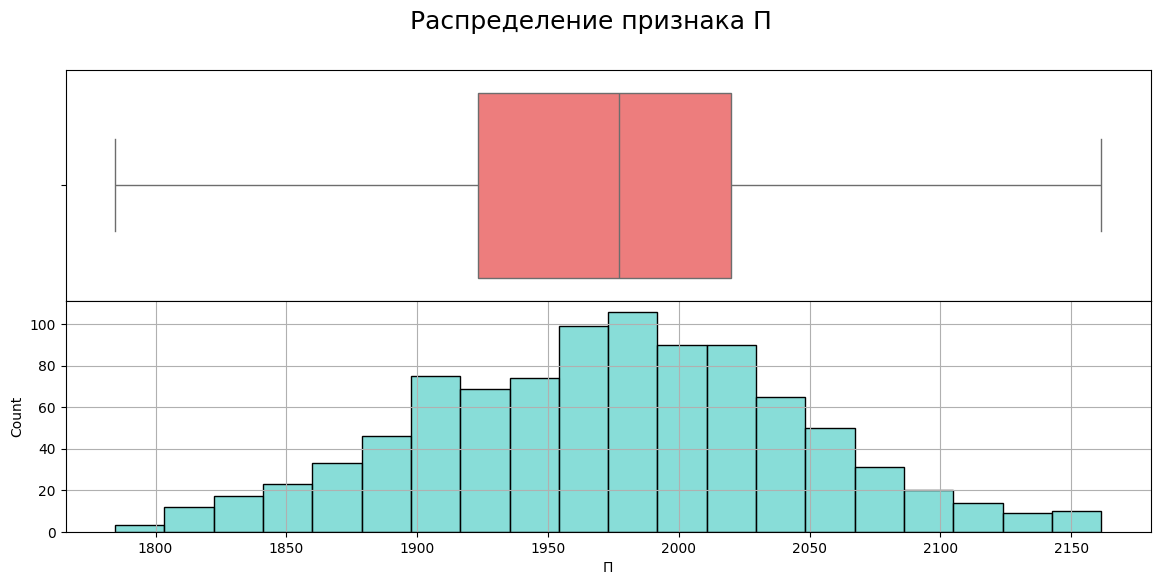

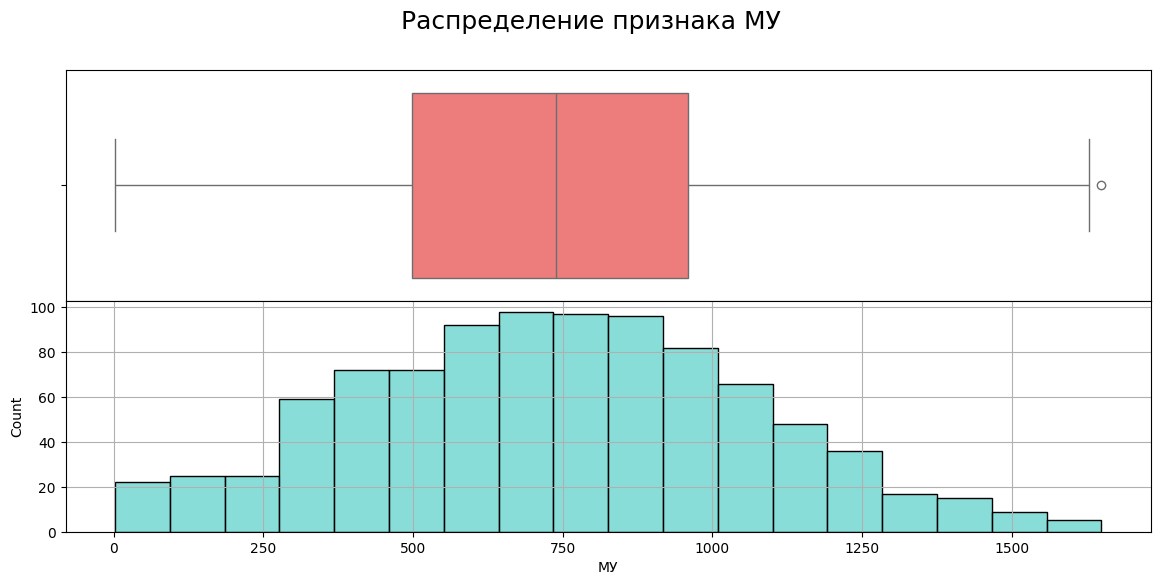

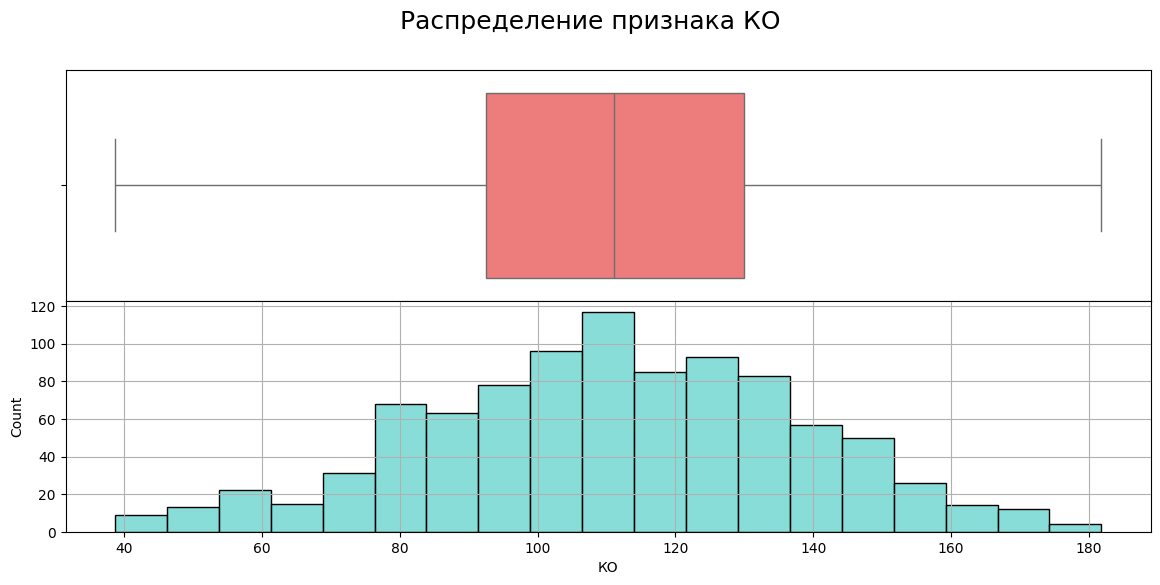

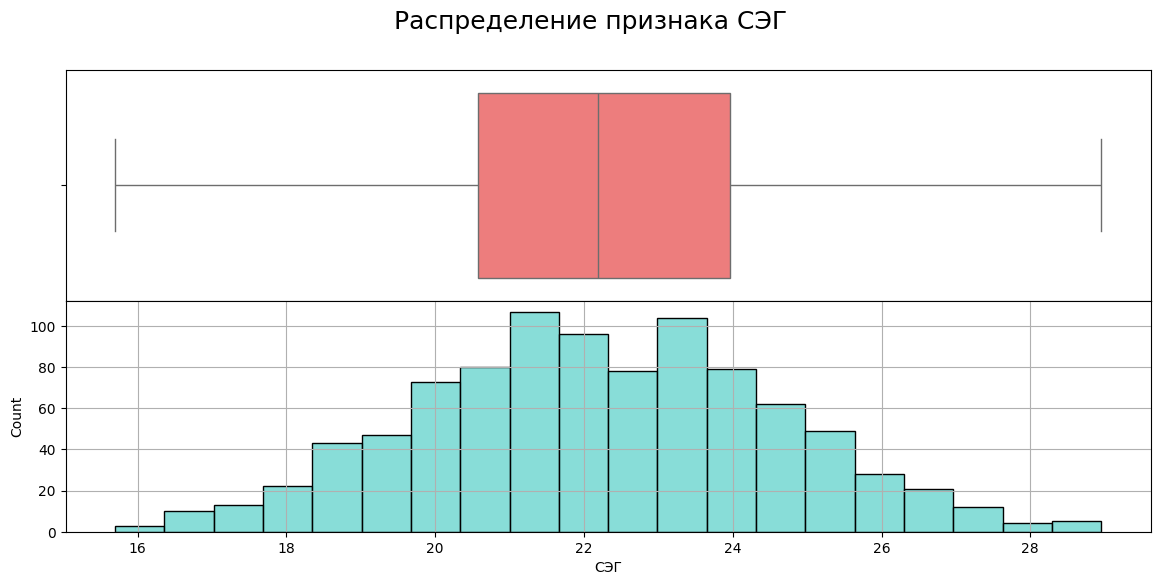

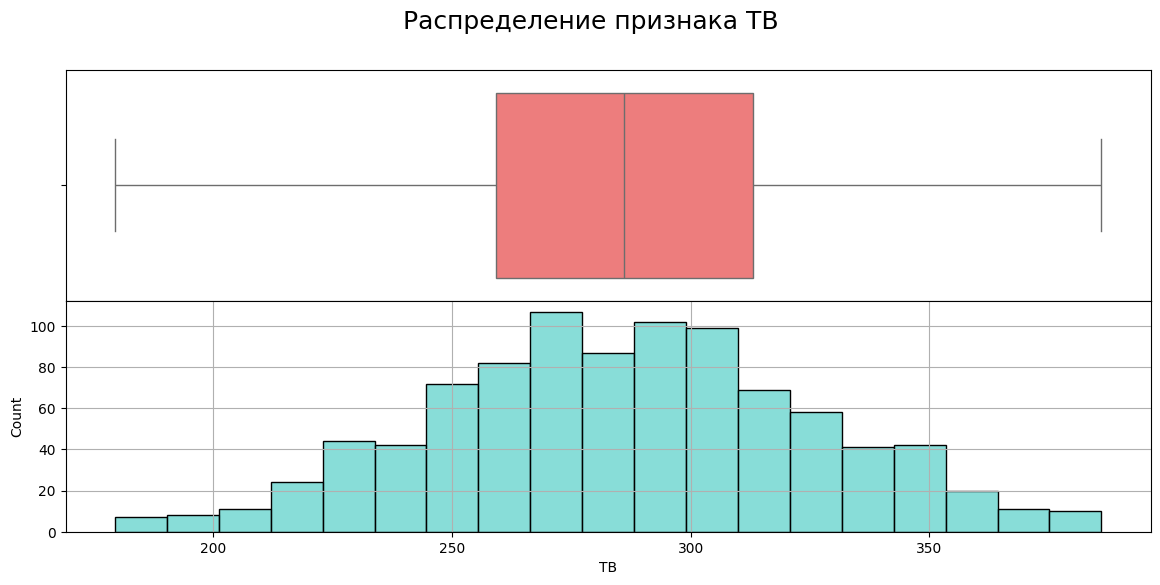

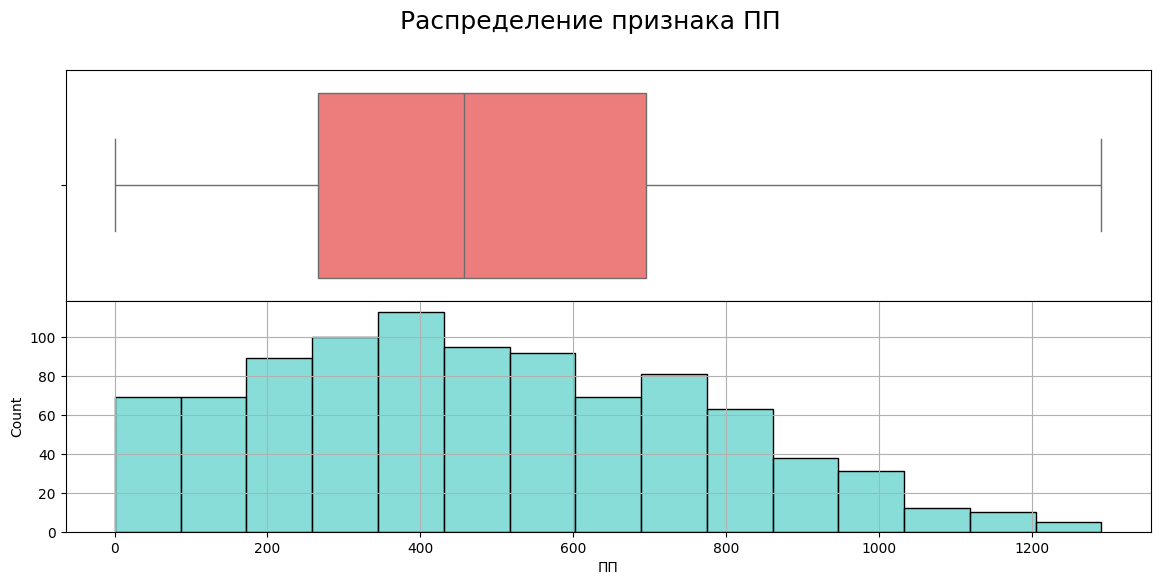

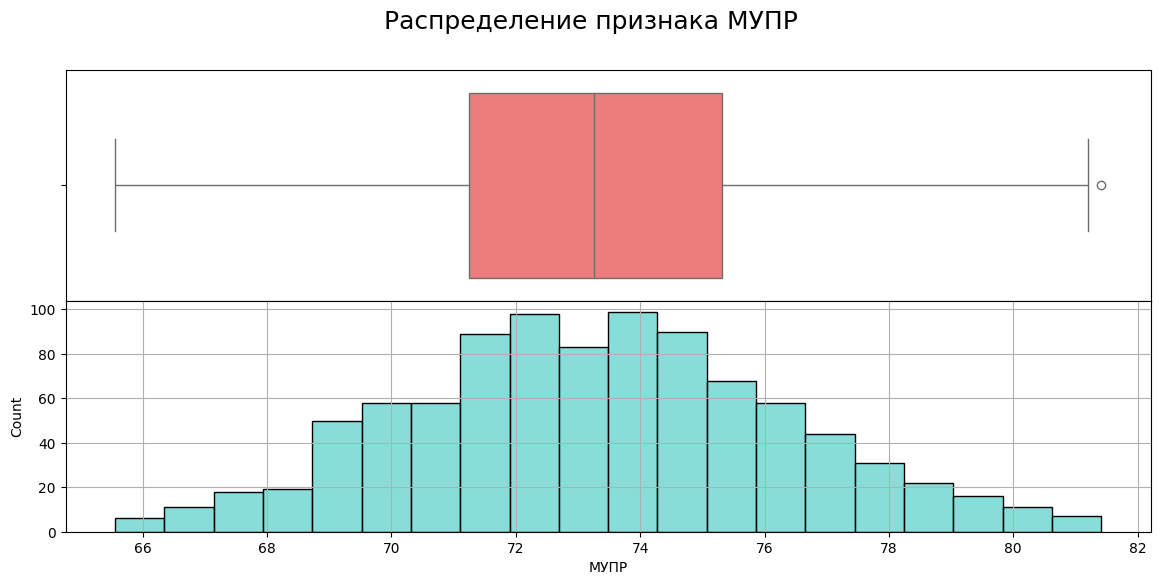

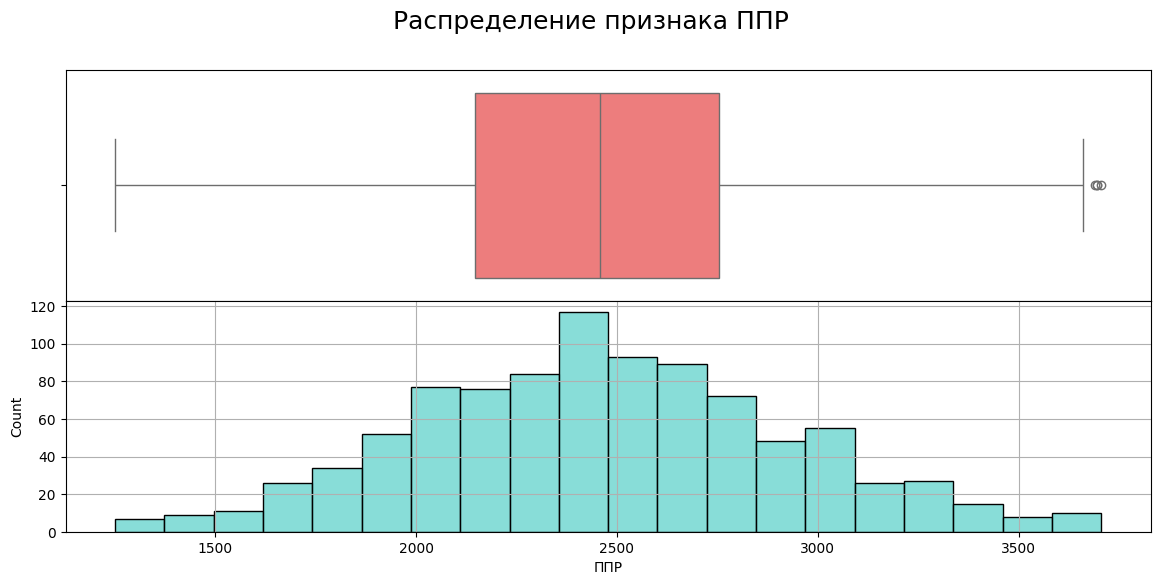

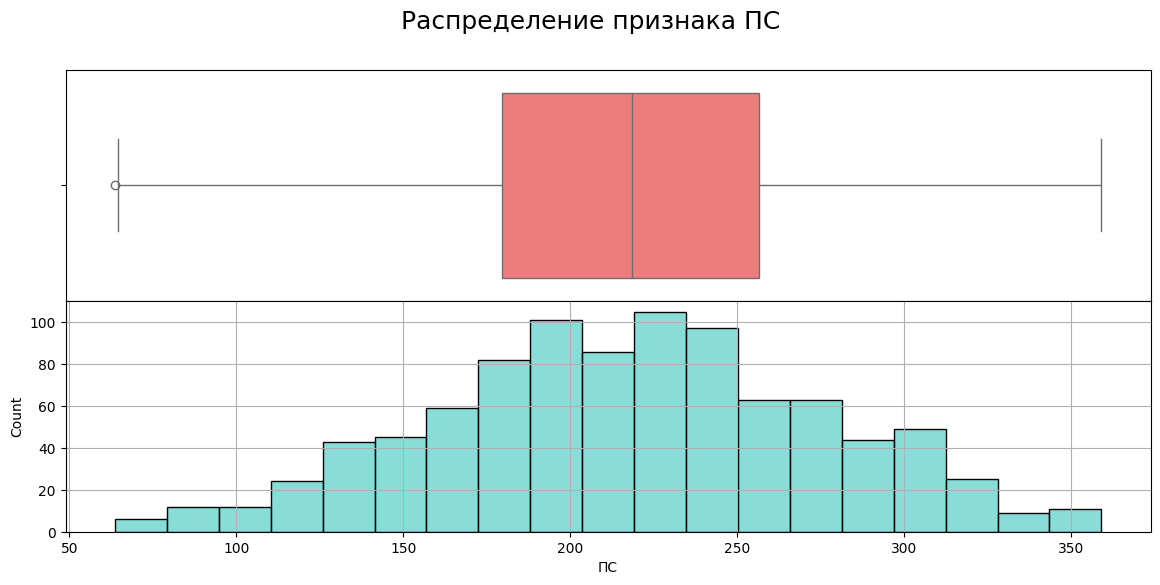

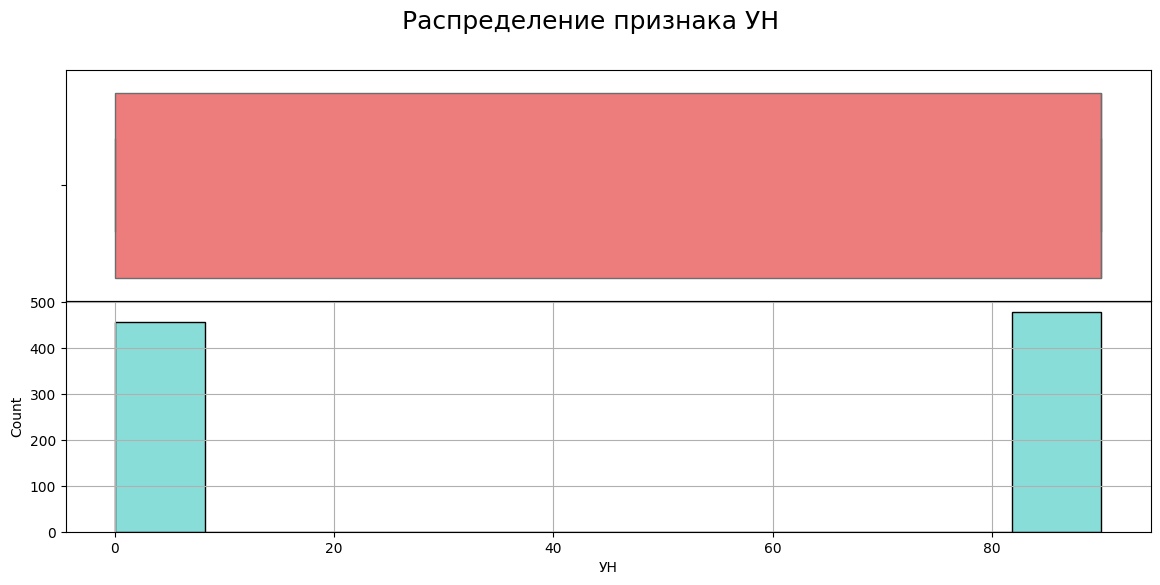

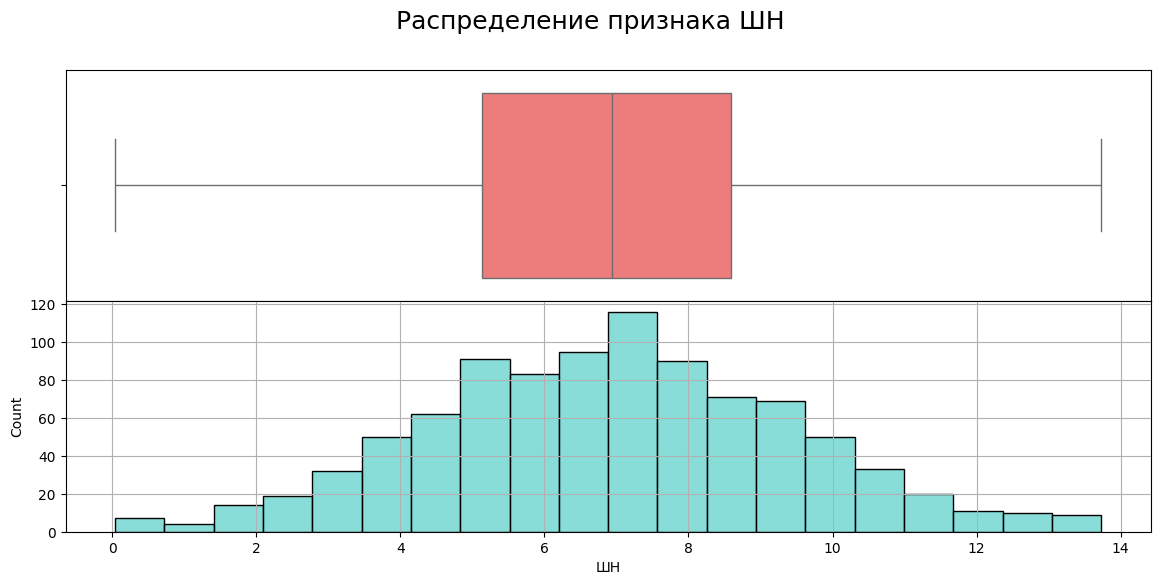

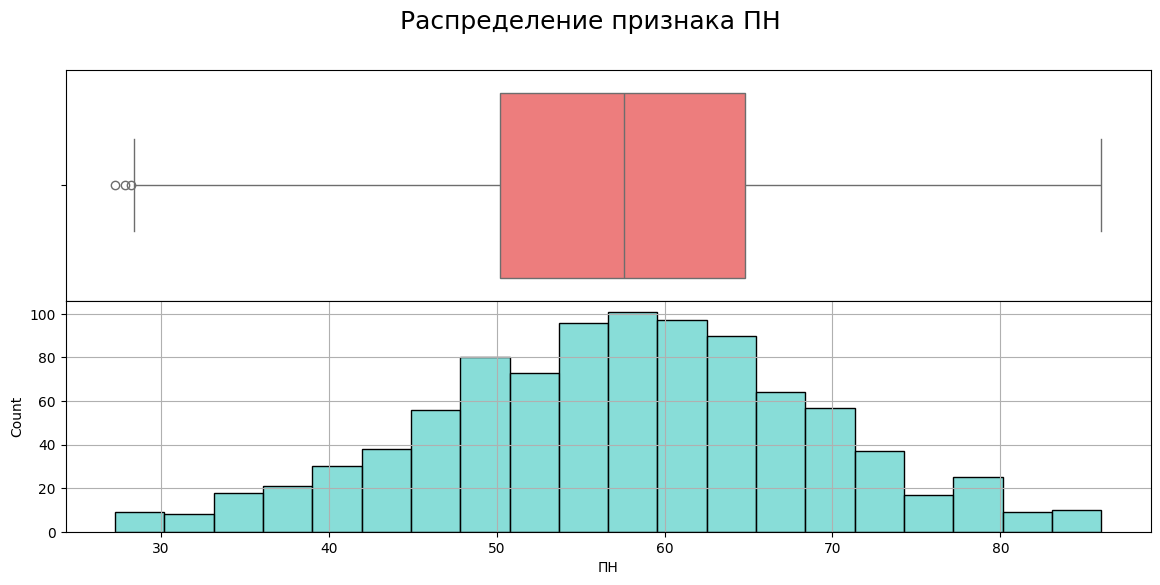

In [30]:
for col in data.columns:
    DistributionPlot(data, col, ['#FF6B6B', '#60D2CB'])

<Axes: >

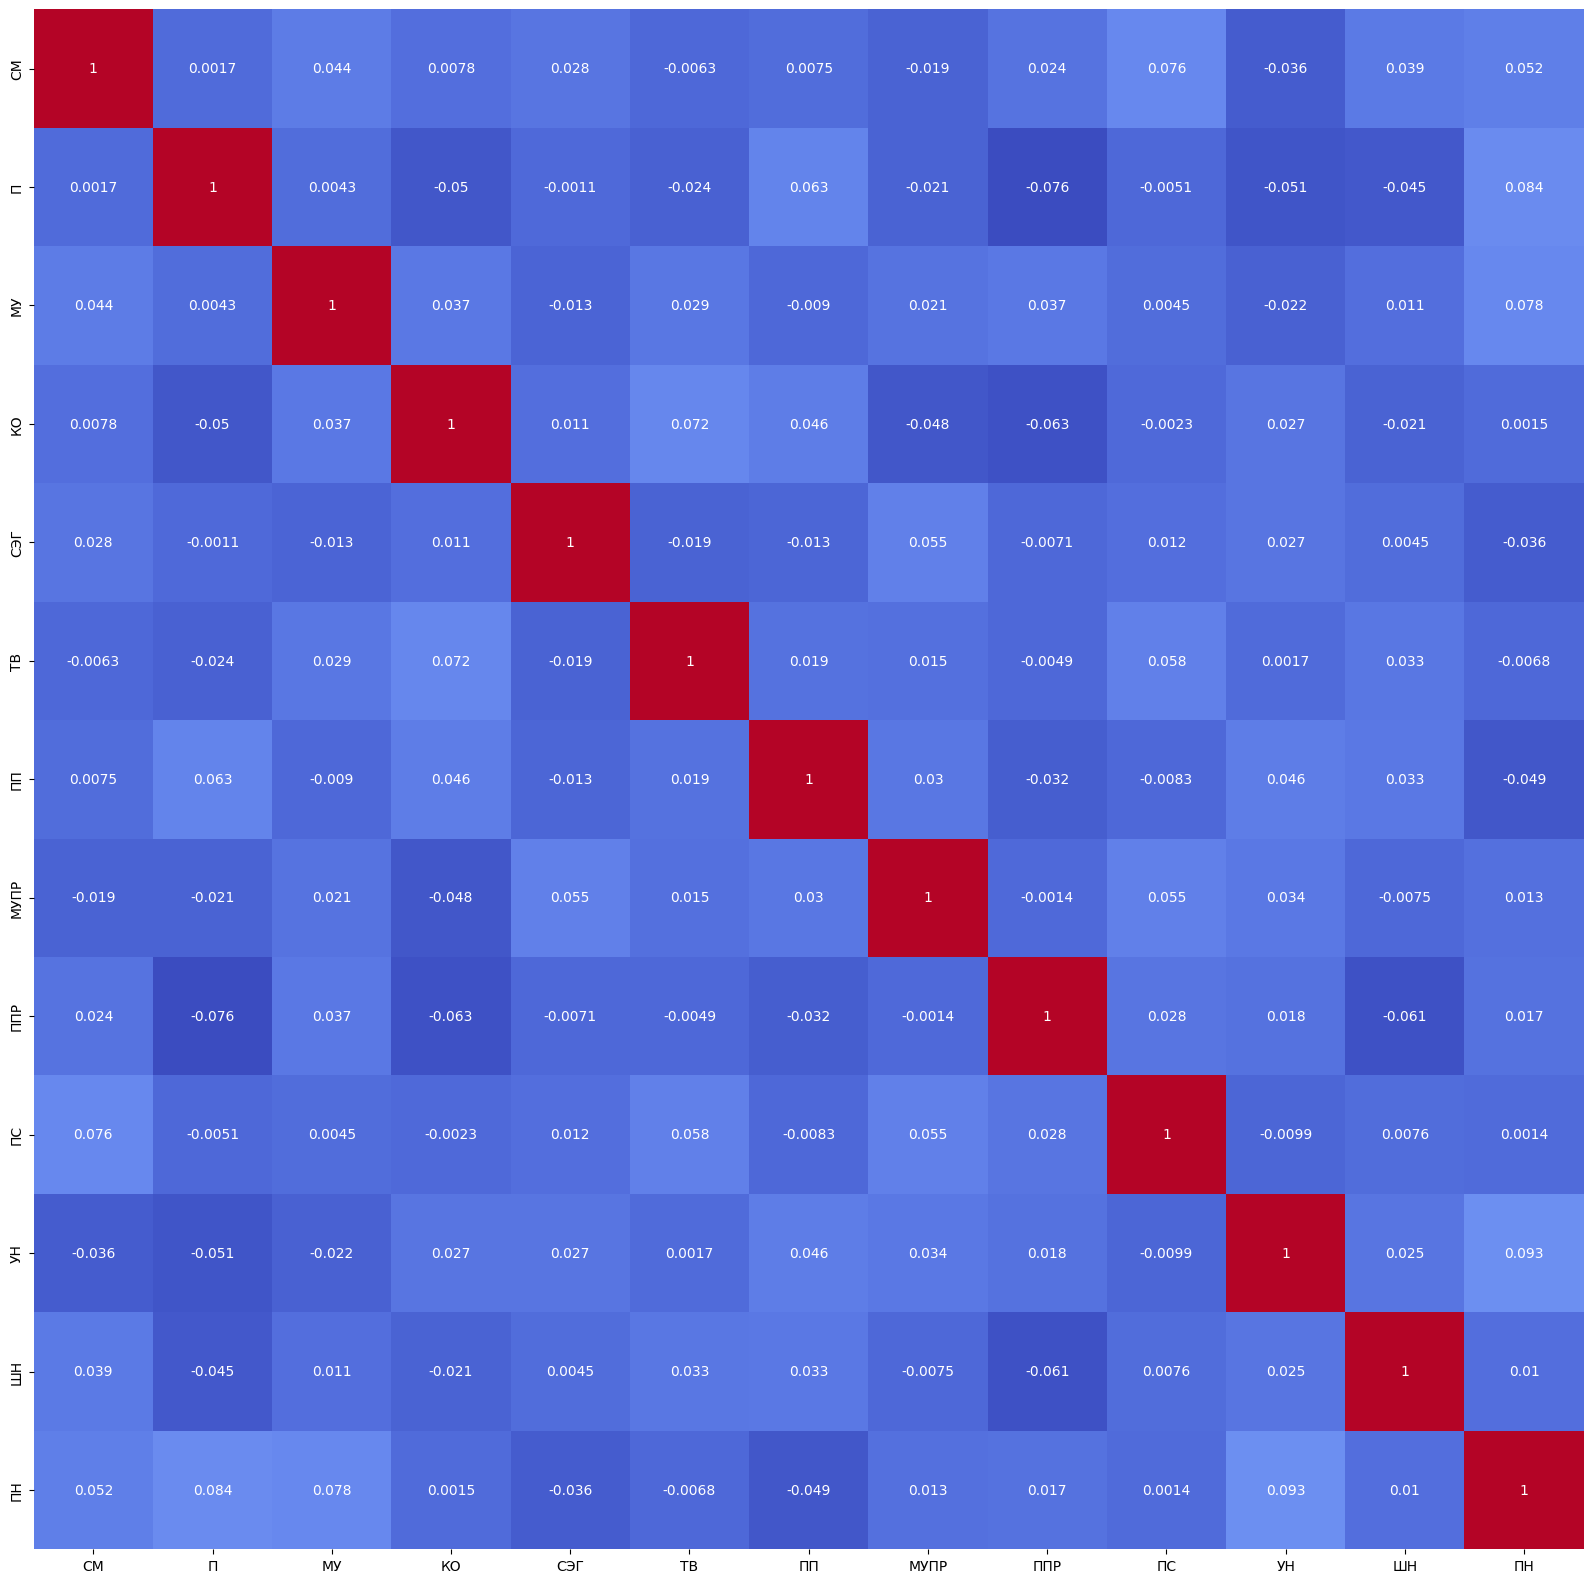

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cbar=False, annot=True, cmap='coolwarm')

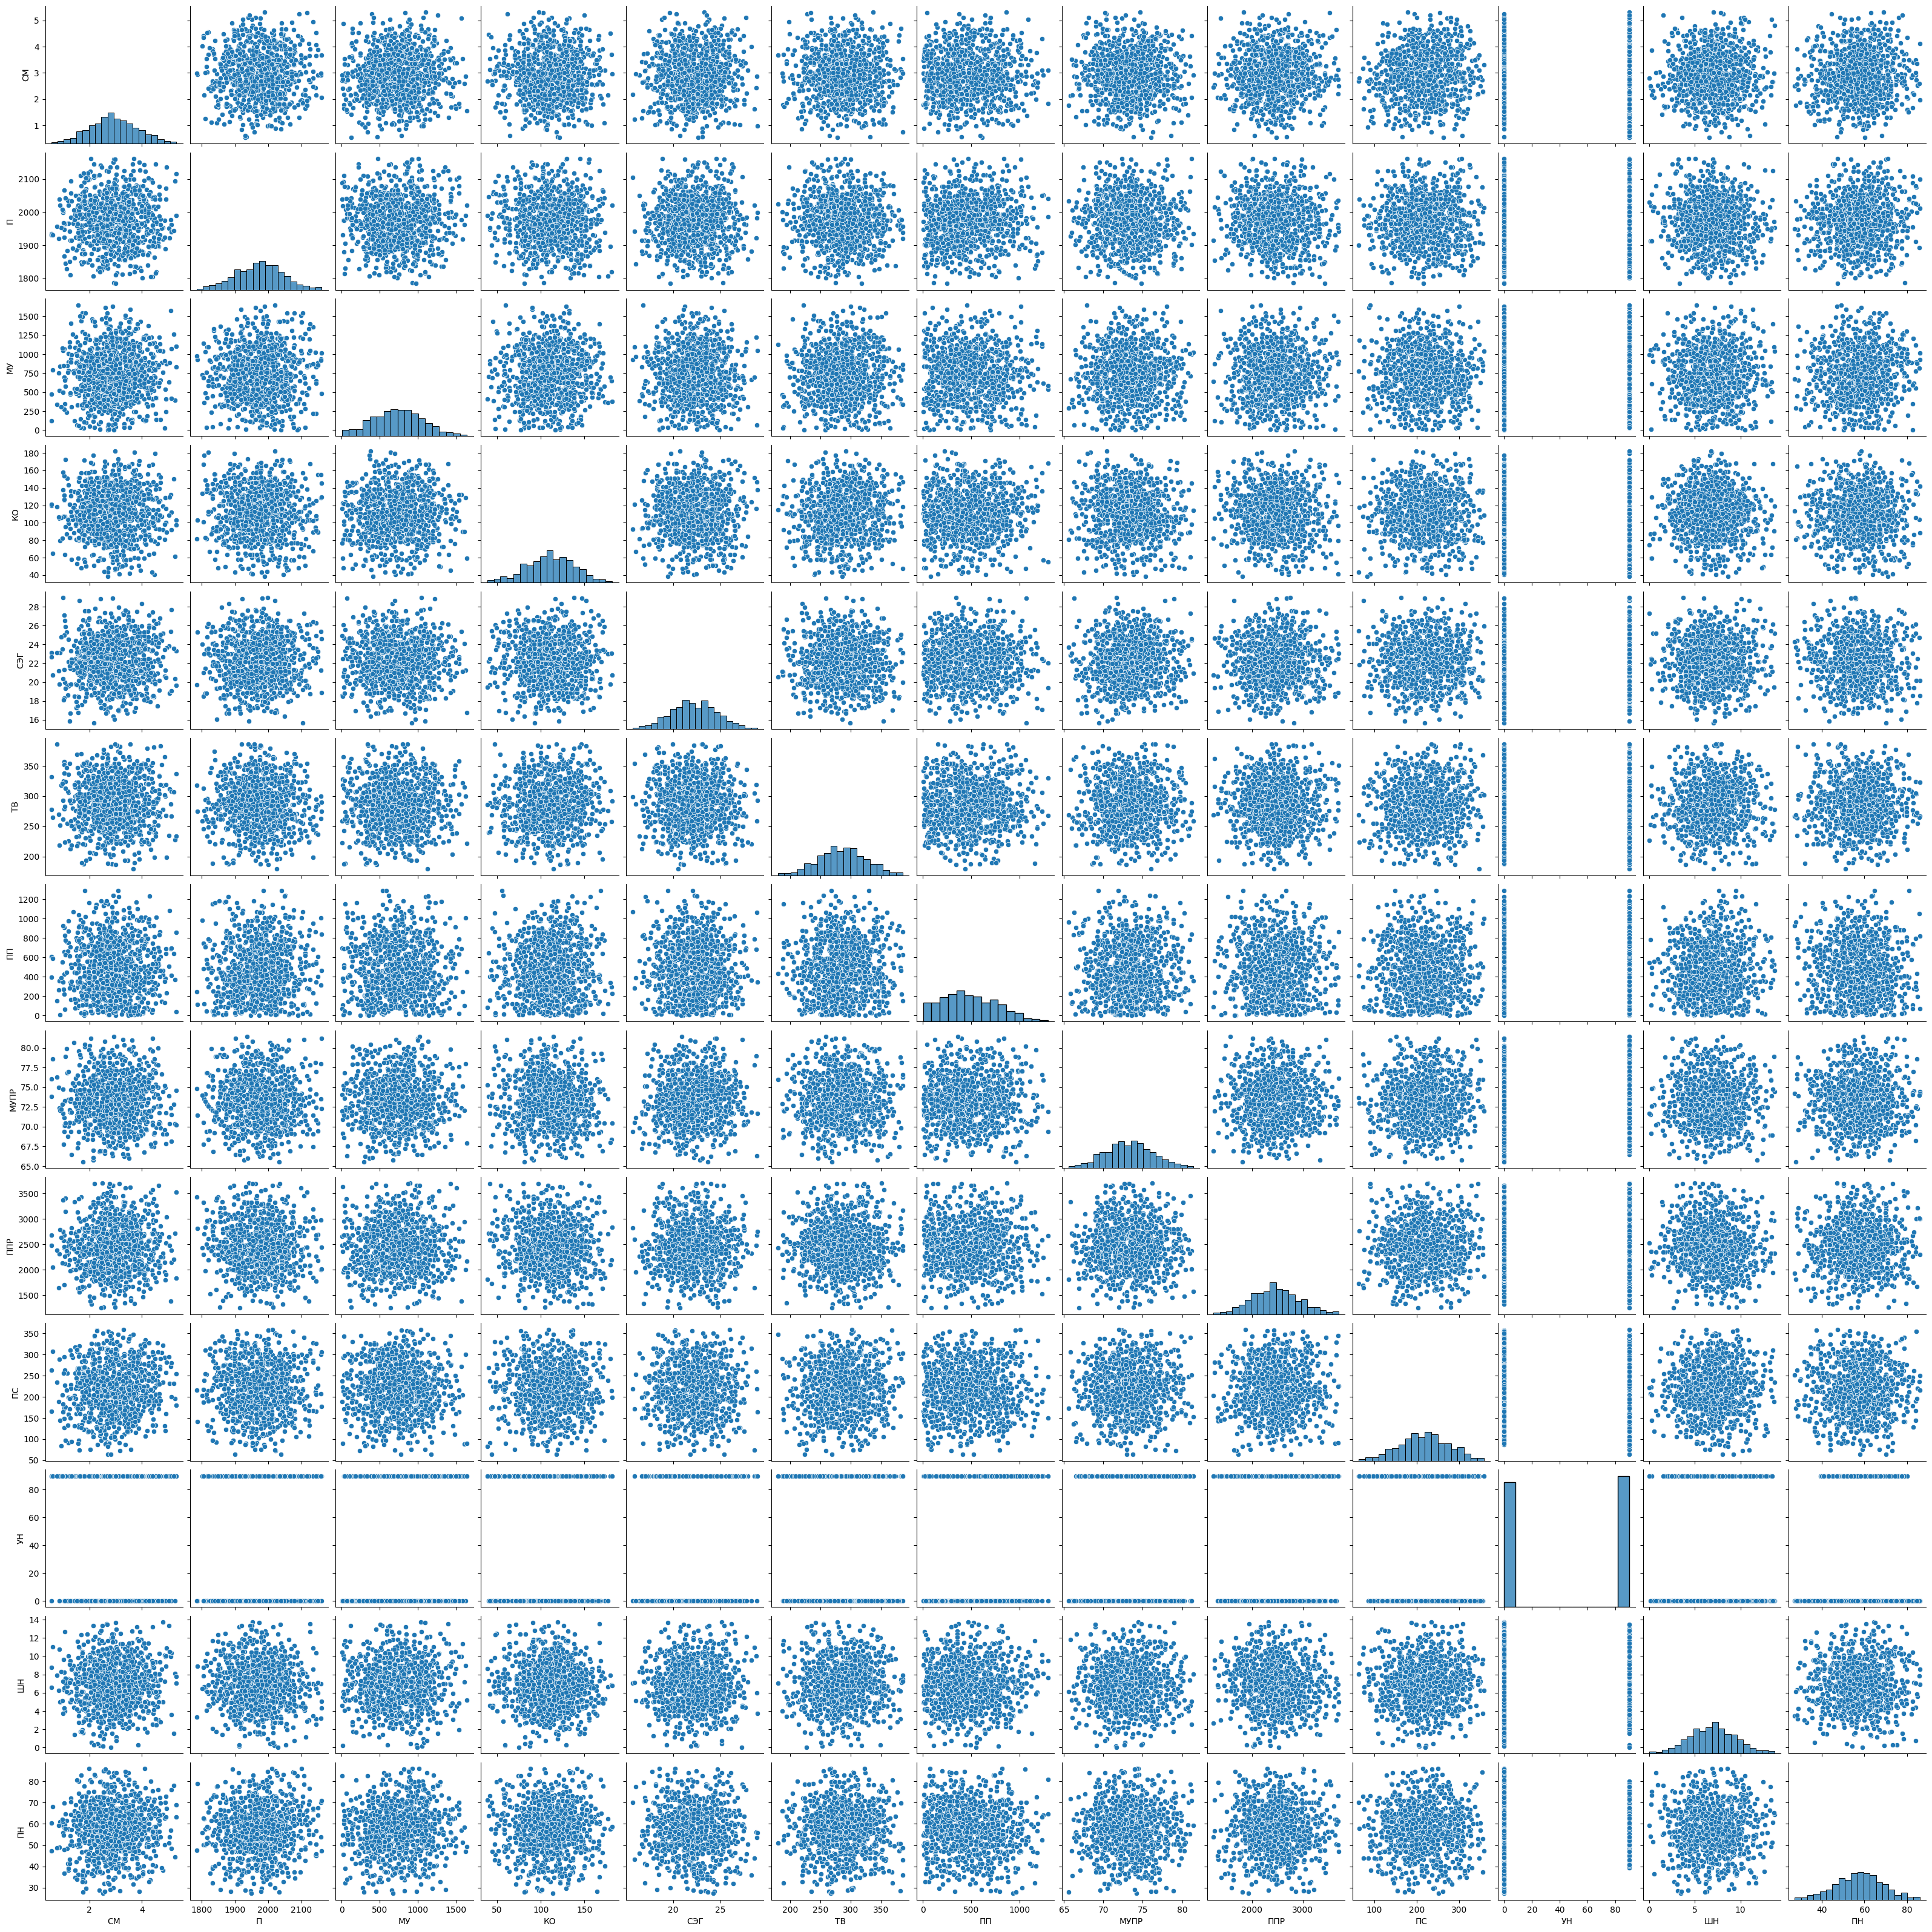

In [32]:
sns.pairplot(data)

<h1>Нормализация данных</h1>

In [33]:
data_norm = data.drop(['МУПР', 'ППР', 'СМ'], axis=1)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data_norm), columns = data_norm.columns)

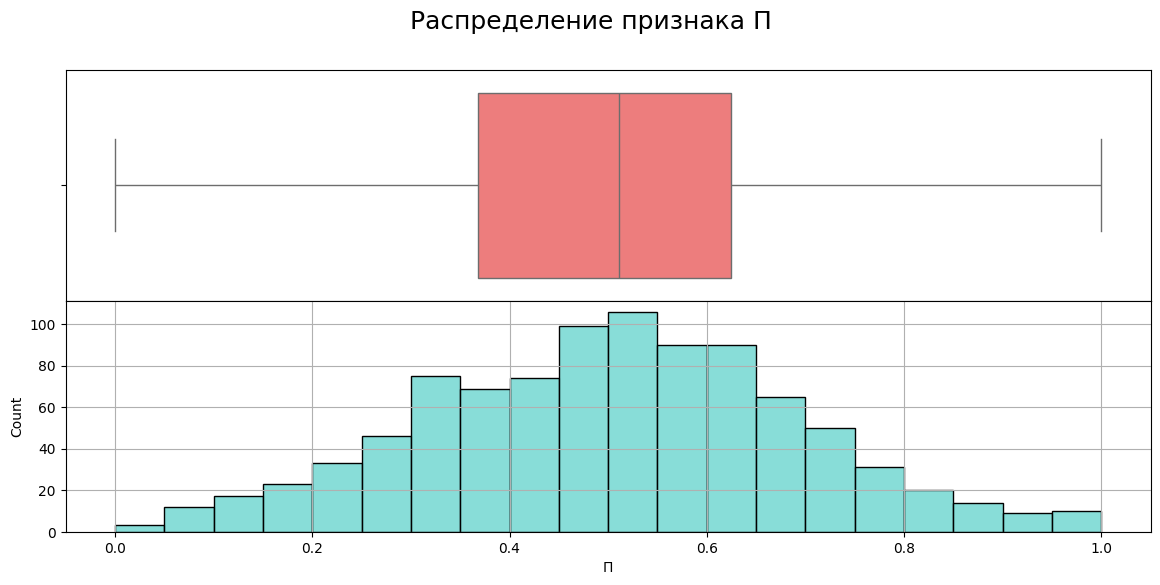

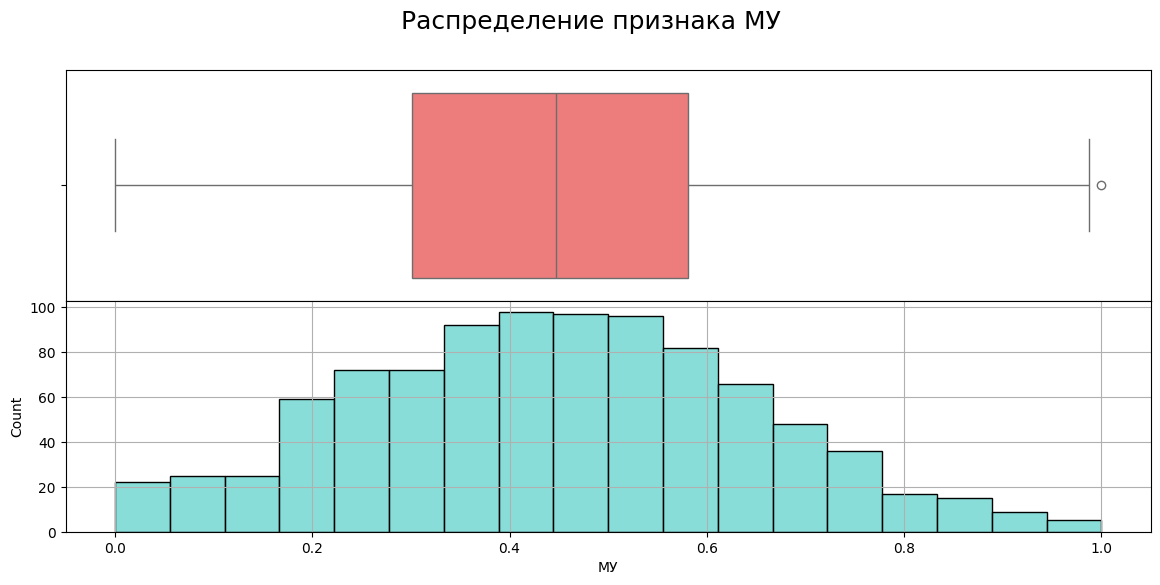

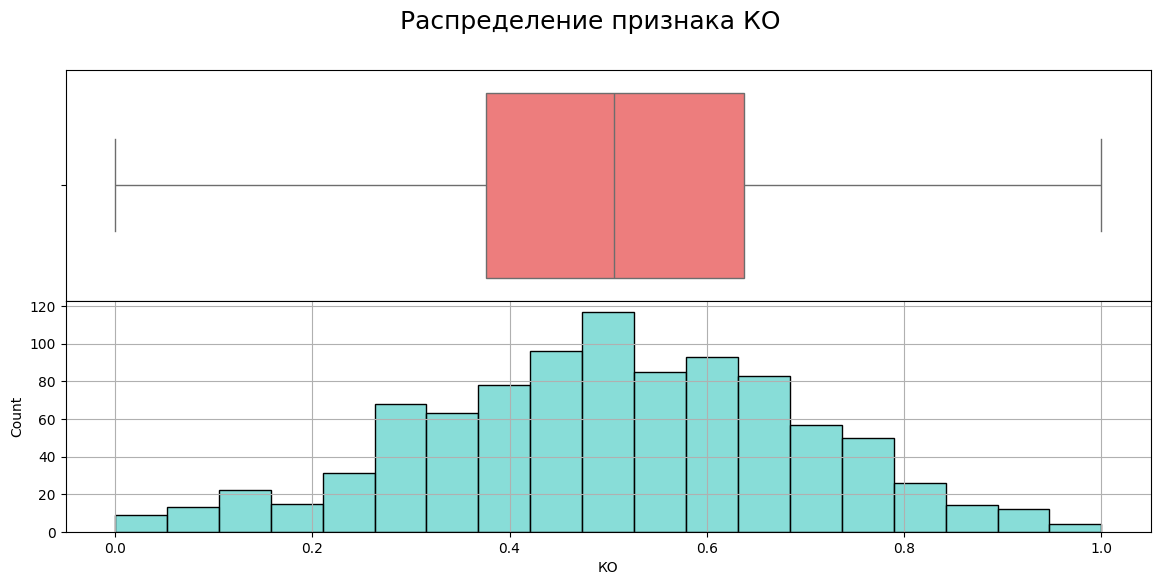

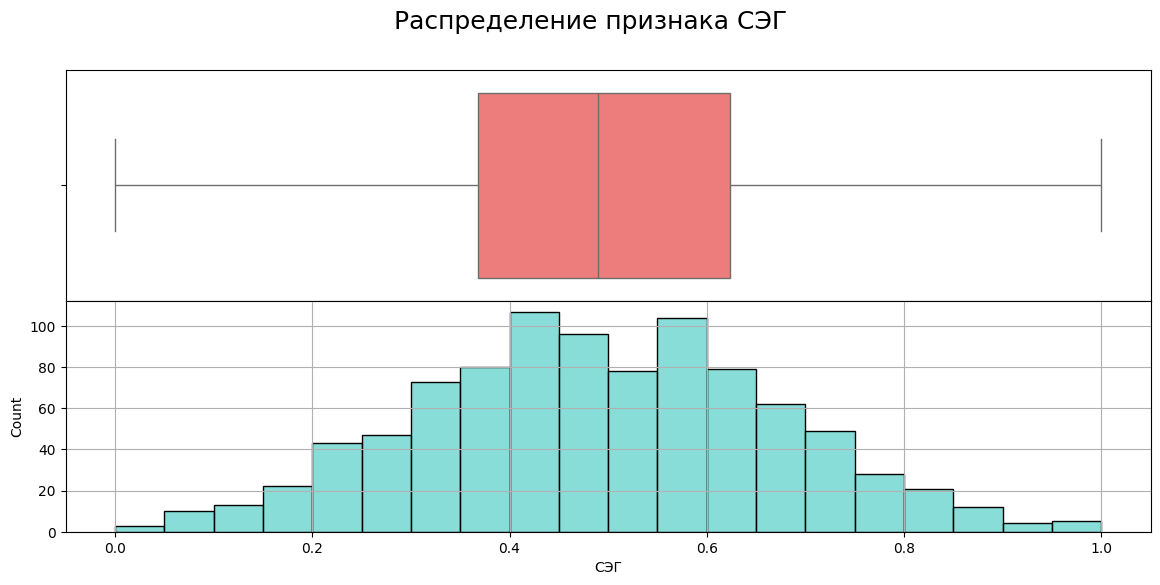

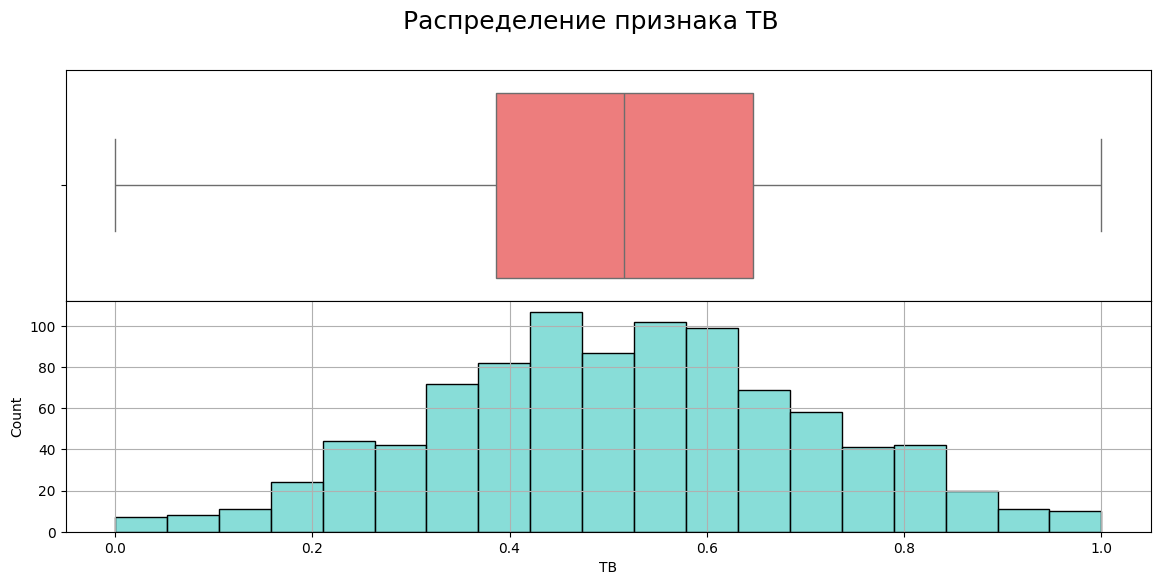

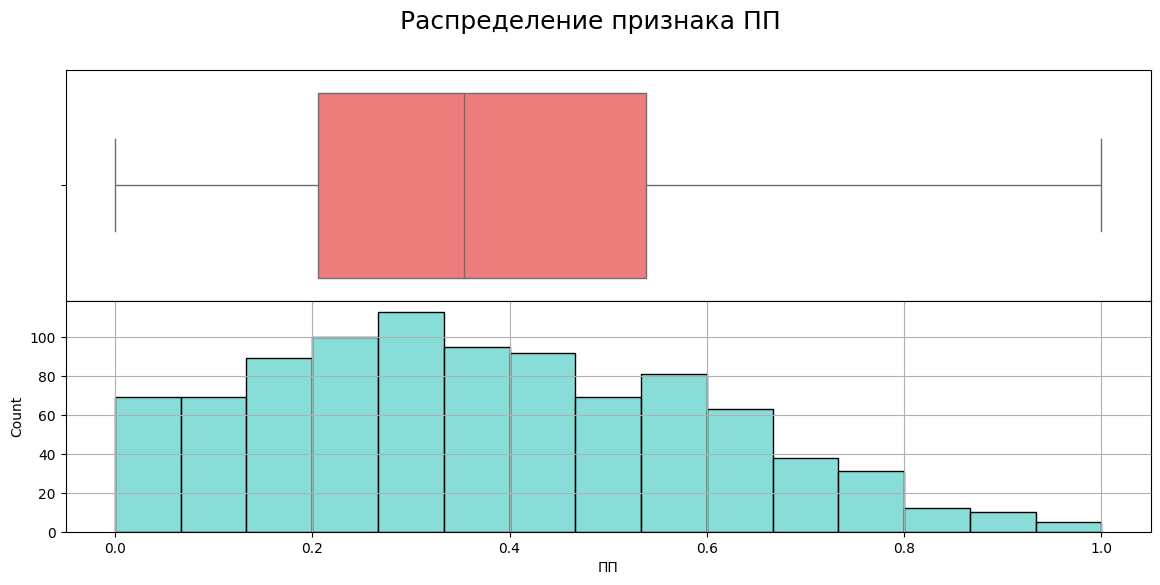

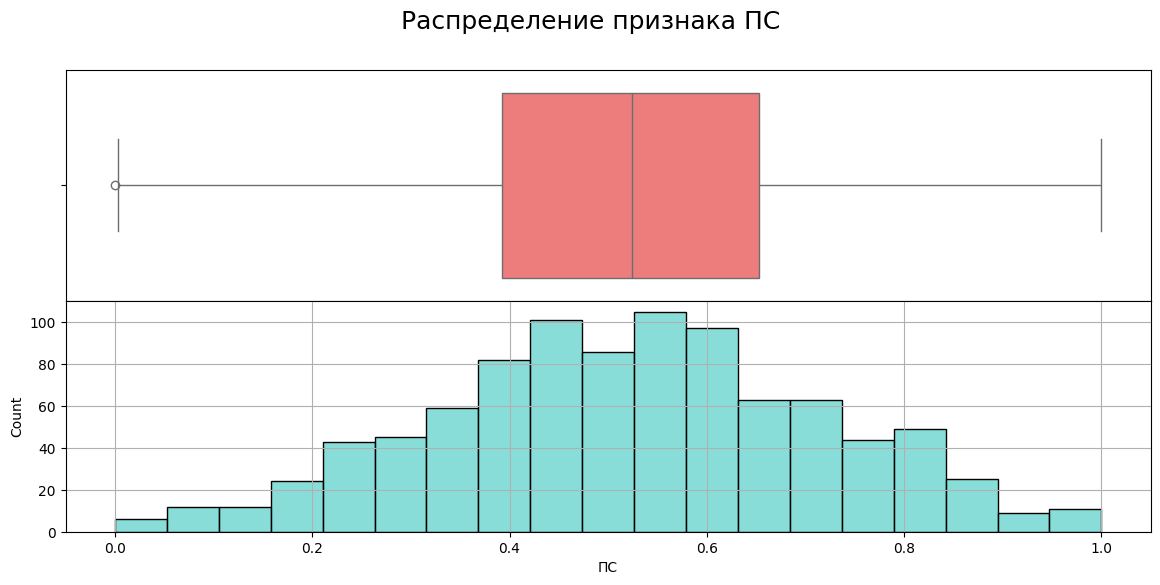

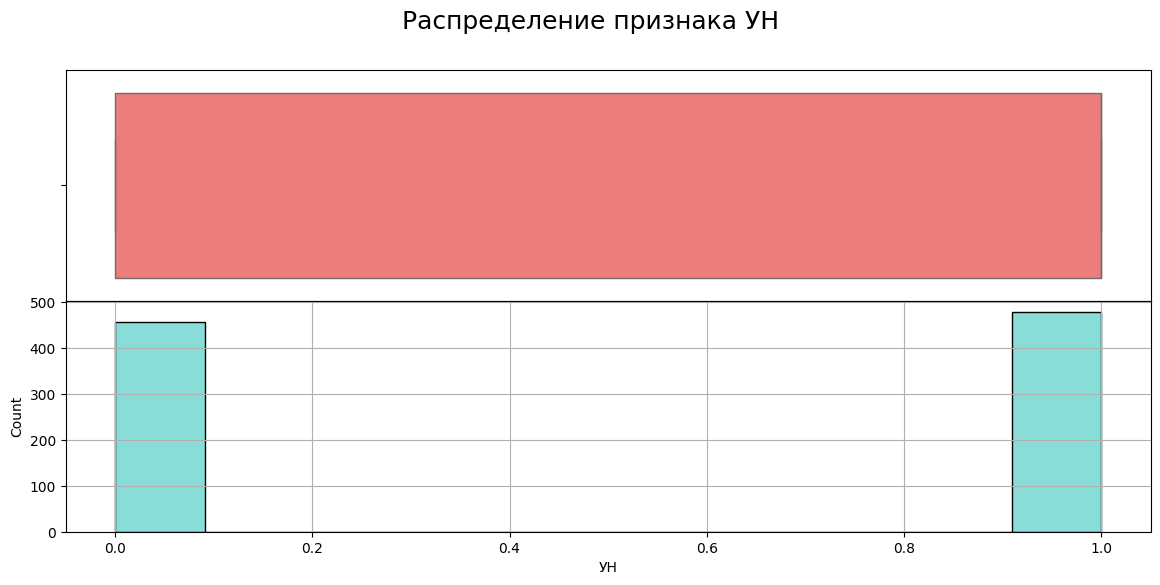

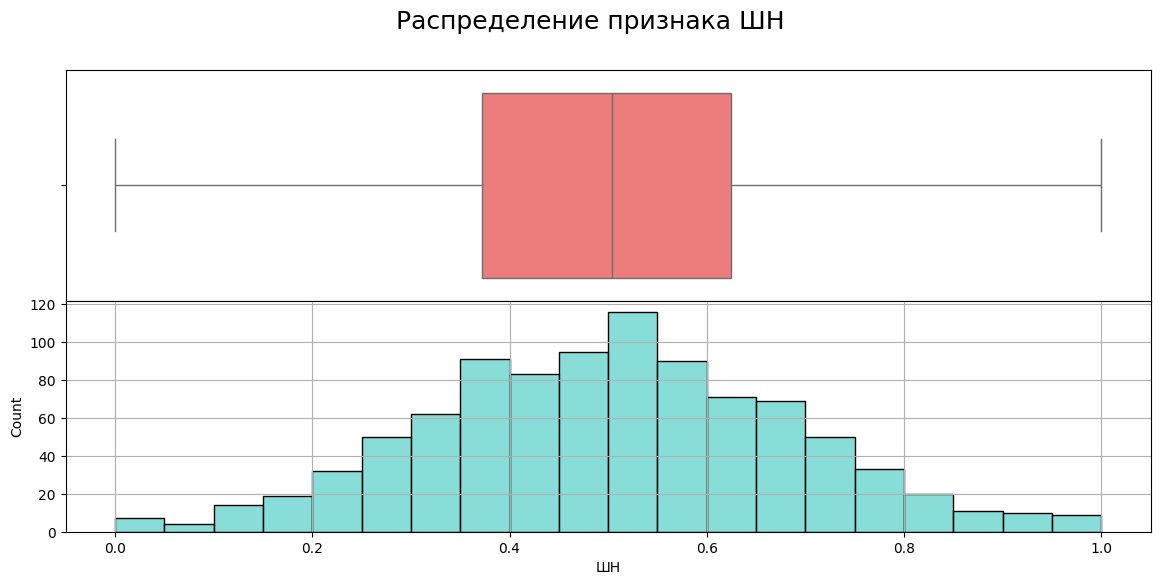

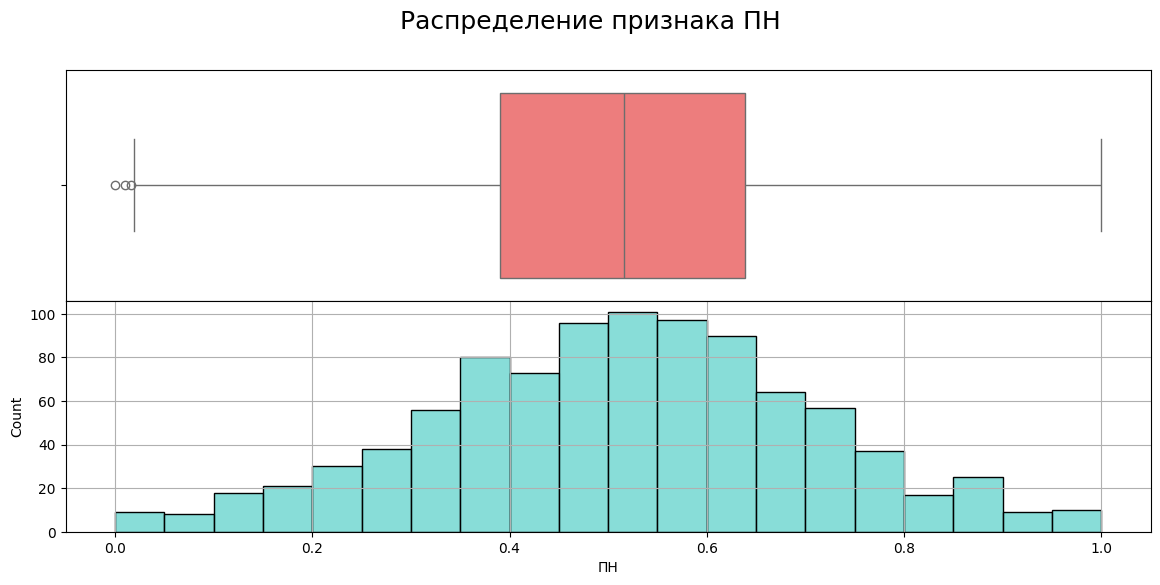

In [36]:
for col in data_norm.columns:
    DistributionPlot(data_norm, col, ['#FF6B6B', '#60D2CB'])

<h1>Подготовка моделей</h1>

In [37]:
y_mupr = data['МУПР']
y_ppr = data['ППР']
y_SM = data['СМ']
dataX = data.drop(['МУПР', 'ППР', 'СМ'], axis=1)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tqdm import tqdm

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_mupr, test_size=0.3, random_state=3)





In [40]:
def my_best_model(X, y):
    algos = {
        'KNeighborsRegressor': {
            'model' : KNeighborsRegressor(),
            'params' : {
                'n_neighbors' : [3, 5, 7, 9, 11],
                'weights' : ['uniform', 'distance'],
                'p' : [1, 2, 3]
            }
        },
        
        'RandomForestRegressor' : {
            'model' : RandomForestRegressor(),
            'params' : {
                'n_estimators' : [5,10,15,20,30,50],
                'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
                'max_depth' : [None, 5, 10, 20, 30]
            }
        },
        
        'AdaBoostRegressor' : {
            'model' : AdaBoostRegressor(),
            'params' : {
                'n_estimators' : [5, 10, 15, 20, 30, 50],
                'loss' : ['linear', 'square', 'exponential']
            }
        },
        
        'XGBRegressor' : {
            'model' : XGBRegressor(),
            'params' : {
                'n_estimators' : [10, 25, 35, 50,100],
                'learning_rate' : [0.1, 0.2, 0.3, 0.45, 0.6, 0.8]
            }
        }
    }
    
    scores = []
    for algo_name, config in tqdm(algos.items()):
        gs = GridSearchCV(config['model'], config['params'], cv=5, return_train_score=False, scoring='r2')
        gs.fit(X, y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
        
    

In [41]:
res_mupr = my_best_model(X_train, y_train)

100%|██████████| 4/4 [02:22<00:00, 35.66s/it]


In [42]:
res_mupr.sort_values(['best_score']).iloc[-1]

model                              AdaBoostRegressor
best_score                                 -0.040924
best_params    {'loss': 'linear', 'n_estimators': 5}
Name: 2, dtype: object

In [43]:
res_mupr.sort_values(['best_score']).iloc[-1]['best_params']

{'loss': 'linear', 'n_estimators': 5}

In [44]:
res_mupr.sort_values(['best_score'])

model  best_score  \
3           XGBRegressor   -0.075277   
0    KNeighborsRegressor   -0.065727   
1  RandomForestRegressor   -0.043364   
2      AdaBoostRegressor   -0.040924   

                                         best_params  
3         {'learning_rate': 0.1, 'n_estimators': 10}  
0  {'n_neighbors': 11, 'p': 1, 'weights': 'distan...  
1  {'criterion': 'absolute_error', 'max_depth': 5...  
2              {'loss': 'linear', 'n_estimators': 5}

MAE:  2.580901664084166
MSE:  10.17353817721328
R2:  -52.405113369249406


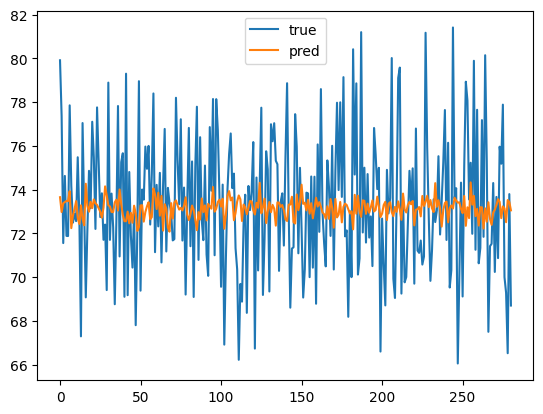

In [45]:
RFG = RandomForestRegressor(criterion = 'absolute_error', max_depth=5, n_estimators=30)
RFG.fit(X_train, y_train)
print('MAE: ', mean_absolute_error(RFG.predict(X_test), y_test))
print('MSE: ', mean_squared_error(RFG.predict(X_test), y_test))
print('R2: ', r2_score(RFG.predict(X_test), y_test))
plt.plot(y_test.values, label='true')
plt.plot(RFG.predict(X_test), label='pred')
plt.legend()
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data_norm, y_ppr, test_size=0.3, random_state=3)

In [47]:
data_norm

П        МУ        КО       СЭГ        ТВ        ПП        ПС  \
0    0.651097  0.447061  0.079153  0.607435  0.509164  0.162230  0.529221   
1    0.651097  0.447061  0.630983  0.418887  0.583596  0.162230  0.529221   
2    0.651097  0.455721  0.511257  0.495653  0.509164  0.162230  0.529221   
3    0.571539  0.452685  0.511257  0.495653  0.509164  0.162230  0.529221   
4    0.332865  0.488508  0.511257  0.495653  0.509164  0.162230  0.529221   
..        ...       ...       ...       ...       ...       ...       ...   
931  0.444480  0.552781  0.337550  0.333908  0.703458  0.161609  0.207613   
932  0.704373  0.268550  0.749605  0.294428  0.362087  0.271207  0.182974   
933  0.498274  0.251612  0.501991  0.623085  0.334063  0.572959  0.585446   
934  0.748688  0.448724  0.717585  0.267818  0.466417  0.496511  0.451779   
935  0.280923  0.251903  0.632264  0.888354  0.588206  0.587373  0.443749   

      УН        ШН        ПН  
0    0.0  0.289334  0.557156  
1    0.0  0.362355  0.335840  
2    0.0  0.362355  0.506083  
3    0.0  0.362355  0.557156  
4    0.0  0.362355  0.727399  
..   ...       ...       ...  
931  1.0  0.660014  0.336177  
932  1.0  0.768759  0.450768  
933  1.0  0.301102  0.687046  
934  1.0  0.458245  0.527552  
935  1.0  0.441137  0.853966  

[936 rows x 10 columns]

In [48]:
res_ppr = my_best_model(X_train, y_train)

100%|██████████| 4/4 [02:32<00:00, 38.08s/it]


In [49]:
res_ppr.sort_values(['best_score'])

model  best_score  \
0    KNeighborsRegressor   -0.078867   
3           XGBRegressor   -0.039328   
2      AdaBoostRegressor   -0.014373   
1  RandomForestRegressor    0.007598   

                                         best_params  
0  {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}  
3         {'learning_rate': 0.1, 'n_estimators': 10}  
2        {'loss': 'exponential', 'n_estimators': 10}  
1  {'criterion': 'friedman_mse', 'max_depth': 5, ...

MAE:  363.53586582107914
MSE:  203995.0149086945
R2:  -71.18783293414786


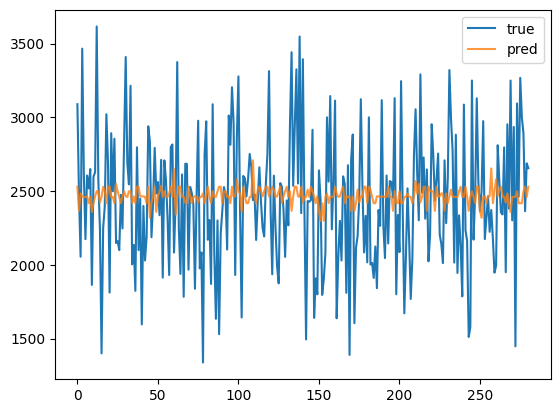

In [50]:
ABR = AdaBoostRegressor(loss='linear', n_estimators=15)
ABR.fit(X_train, y_train)
print('MAE: ', mean_absolute_error(ABR.predict(X_test), y_test))
print('MSE: ', mean_squared_error(ABR.predict(X_test), y_test))
print('R2: ', r2_score(ABR.predict(X_test), y_test))
plt.plot(y_test.values, label='true')
plt.plot(ABR.predict(X_test), label='pred', alpha=0.8)
plt.legend()
plt.show()

MAE:  364.2565180992295
MSE:  208084.35472359724
R2:  -0.02668357601546245


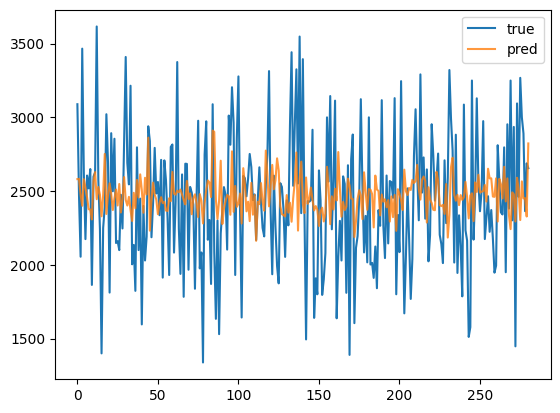

In [51]:
RFRtest = RandomForestRegressor(criterion='absolute_error', max_depth=None)
RFRtest.fit(X_train, y_train)
print('MAE: ', mean_absolute_error(RFRtest.predict(X_test), y_test))
print('MSE: ', mean_squared_error(RFRtest.predict(X_test), y_test))
print('R2: ', r2_score(y_test, RFRtest.predict(X_test)))
plt.plot(y_test.values, label='true')
plt.plot(RFRtest.predict(X_test), label='pred', alpha=0.8)
plt.legend()
plt.show()

Строим пайплайн с нормализацией

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

MAE:  366.01243624080524
MSE:  211334.7303502368
R2:  -0.042720857031541604


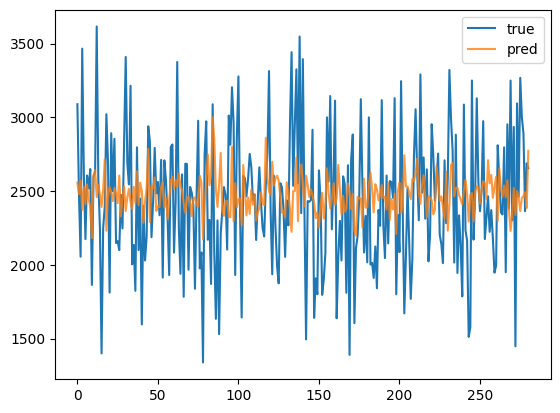

In [53]:
X_train, X_test, y_train, y_test = train_test_split(dataX, y_ppr, test_size=0.3, random_state=3)

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', RandomForestRegressor(criterion='absolute_error', max_depth=None))
])

pipe.fit(X_train, y_train)

print('MAE: ', mean_absolute_error(pipe.predict(X_test), y_test))
print('MSE: ', mean_squared_error(pipe.predict(X_test), y_test))
print('R2: ', r2_score(y_test, pipe.predict(X_test)))
plt.plot(y_test.values, label='true')
plt.plot(pipe.predict(X_test), label='pred', alpha=0.8)
plt.legend()
plt.show()

In [54]:
import pickle

ppr_name = 'model_ppr.pickle'
pickle.dump(pipe, open(f"model/ppr/{ppr_name}", "wb"))

In [55]:
!pip freeze

absl-py==2.2.2
anyio @ file:///C:/b/abs_31grv7a7bl/croot/anyio_1729121290992/work
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/b/abs_f11axiliot/croot/argon2-cffi-bindings_1736182463870/work
asttokens @ file:///C:/b/abs_9662ywy9fp/croot/asttokens_1743630464377/work
astunparse==1.6.3
async-lru @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/async-lru_1701796859357/work
attrs @ file:///C:/b/abs_89hmquz5ga/croot/attrs_1734533130810/work
babel @ file:///C:/b/abs_ffzt1bmjth/croot/babel_1737454394148/work
beautifulsoup4 @ file:///C:/b/abs_d5wytg_p0w/croot/beautifulsoup4-split_1718029833749/work
bleach @ file:///C:/b/abs_925i9psm3u/croot/bleach_1732292896852/work
Brotli @ file:///C:/b/abs_c415aux9ra/croot/brotli-split_1736182803933/work
certifi @ file:///C:/b/abs_8a944p1_gn/croot/certifi_1738623753421/work/certifi
cffi @ file:///C:/b/abs_29_b57if3f/croot/cffi_1736184144340/work
charset-normalizer @ file:///croot/char

In [56]:
import sklearn
sklearn.__version__

'1.6.1'

In [57]:
!pip install tensorflow

In [58]:
from keras.models import Sequential
from keras.layers import Dense,  Dropout, BatchNormalization, Normalization

In [59]:
X_train, X_test, y_train, y_test = train_test_split(dataX, y_SM, test_size=0.2, random_state=3)

In [60]:
X_train.shape[1]

10

In [61]:
Norm = Normalization(axis=-1)
Norm.adapt(X_train.to_numpy())

In [62]:
model = Sequential()
model.add(Norm)
model.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1))



C:\Users\darko\anaconda3\envs\mlenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (748, 10)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (88.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21 (88.00 B)

In [64]:
import keras
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [65]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/100
22/22 - 1s - 60ms/step - loss: 9.0423 - mae: 2.8402 - val_loss: 8.8408 - val_mae: 2.8201
Epoch 2/100
22/22 - 0s - 5ms/step - loss: 7.2524 - mae: 2.5132 - val_loss: 7.2695 - val_mae: 2.5085
Epoch 3/100
22/22 - 0s - 5ms/step - loss: 5.6018 - mae: 2.1535 - val_loss: 5.2976 - val_mae: 2.0598
Epoch 4/100
22/22 - 0s - 5ms/step - loss: 3.7480 - mae: 1.6721 - val_loss: 3.0909 - val_mae: 1.4787
Epoch 5/100
22/22 - 0s - 5ms/step - loss: 2.3272 - mae: 1.2636 - val_loss: 1.4242 - val_mae: 0.9790
Epoch 6/100
22/22 - 0s - 5ms/step - loss: 1.4044 - mae: 0.9475 - val_loss: 1.0337 - val_mae: 0.8351
Epoch 7/100
22/22 - 0s - 6ms/step - loss: 1.2018 - mae: 0.8627 - val_loss: 0.9484 - val_mae: 0.7951
Epoch 8/100
22/22 - 0s - 6ms/step - loss: 1.1341 - mae: 0.8461 - val_loss: 0.9395 - val_mae: 0.7812
Epoch 9/100
22/22 - 0s - 6ms/step - loss: 1.2525 - mae: 0.8820 - val_loss: 0.9206 - val_mae: 0.7809
Epoch 10/100
22/22 - 0s - 6ms/step - loss: 1.1022 - mae: 0.8369 - val_loss: 0.9130 - val_mae: 0.782

Epoch 73/100
23/23 - 0s - loss: 0.7657 - mae: 0.7048 - val_loss: 0.7901 - val_mae: 0.7204 - 71ms/epoch - 3ms/step
Epoch 74/100
23/23 - 0s - loss: 0.7553 - mae: 0.6942 - val_loss: 0.8041 - val_mae: 0.7307 - 69ms/epoch - 3ms/step
Epoch 75/100
23/23 - 0s - loss: 0.7472 - mae: 0.6985 - val_loss: 0.8156 - val_mae: 0.7354 - 68ms/epoch - 3ms/step
Epoch 76/100
23/23 - 0s - loss: 0.7679 - mae: 0.7002 - val_loss: 0.7992 - val_mae: 0.7263 - 70ms/epoch - 3ms/step
Epoch 77/100
23/23 - 0s - loss: 0.7631 - mae: 0.6997 - val_loss: 0.8075 - val_mae: 0.7383 - 67ms/epoch - 3ms/step
Epoch 78/100
23/23 - 0s - loss: 0.7620 - mae: 0.7027 - val_loss: 0.8185 - val_mae: 0.7359 - 67ms/epoch - 3ms/step
Epoch 79/100
23/23 - 0s - loss: 0.7666 - mae: 0.7039 - val_loss: 0.8184 - val_mae: 0.7388 - 69ms/epoch - 3ms/step
Epoch 80/100
23/23 - 0s - loss: 0.7583 - mae: 0.6979 - val_loss: 0.8084 - val_mae: 0.7324 - 67ms/epoch - 3ms/step
Epoch 81/100
23/23 - 0s - loss: 0.7499 - mae: 0.6958 - val_loss: 0.7998 - val_mae: 0.730

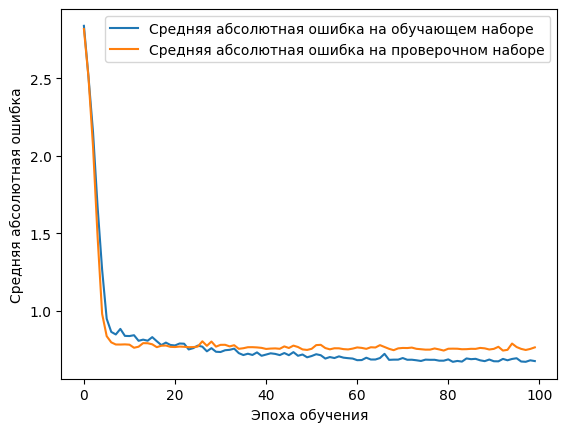

In [66]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [67]:
mean_absolute_error(y_test, model.predict(X_test))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


0.845509064367665

In [68]:
print(np.mean(y_test))
print(np.std(y_test))

2.8209701402147473
0.9692238251394338


Обучим модель снова на 35 эпохах

In [69]:
model = Sequential()
model.add(Norm)
model.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train, 
                    y_train, 
                    epochs=35, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/35


C:\Users\darko\anaconda3\envs\mlenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 - 1s - 57ms/step - loss: 9.0728 - mae: 2.8415 - val_loss: 9.1882 - val_mae: 2.8735
Epoch 2/35
22/22 - 0s - 5ms/step - loss: 7.4703 - mae: 2.5628 - val_loss: 7.6388 - val_mae: 2.5907
Epoch 3/35
22/22 - 0s - 5ms/step - loss: 5.9380 - mae: 2.2541 - val_loss: 5.8302 - val_mae: 2.2118
Epoch 4/35
22/22 - 0s - 5ms/step - loss: 4.3819 - mae: 1.8659 - val_loss: 3.8893 - val_mae: 1.6979
Epoch 5/35
22/22 - 0s - 5ms/step - loss: 2.6777 - mae: 1.3718 - val_loss: 2.0010 - val_mae: 1.1359
Epoch 6/35
22/22 - 0s - 6ms/step - loss: 1.6528 - mae: 1.0359 - val_loss: 1.1472 - val_mae: 0.8657
Epoch 7/35
22/22 - 0s - 6ms/step - loss: 1.2411 - mae: 0.8975 - val_loss: 0.9781 - val_mae: 0.7929
Epoch 8/35
22/22 - 0s - 5ms/step - loss: 1.1354 - mae: 0.8539 - val_loss: 0.8758 - val_mae: 0.7536
Epoch 9/35
22/22 - 0s - 5ms/step - loss: 1.1572 - mae: 0.8661 - val_loss: 0.8066 - val_mae: 0.7330
Epoch 10/35
22/22 - 0s - 5ms/step - loss: 1.1375 - mae: 0.8478 - val_loss: 0.8931 - val_mae: 0.7663
Epoch 11/35
22/22 -

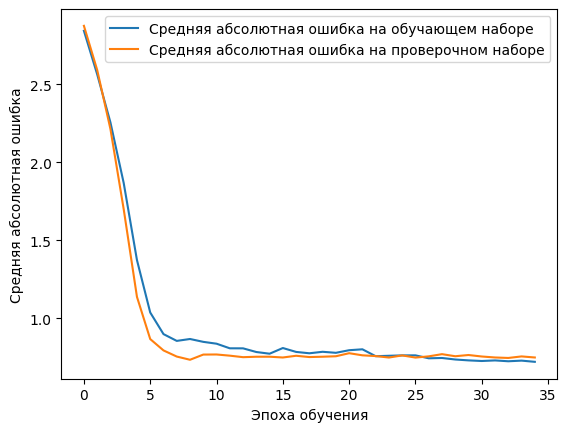

In [70]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [71]:
mean_absolute_error(y_test, model.predict(X_test))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


0.8420372955307172

Модель достигла среднего абсолютного отклонения 0.77 (Проверить другие метрики).

Сохраним модель для дальнейшего применения в приложении

Возможно стоит попробовать удалить выбросы 

In [72]:
model.save('model/matmod/matmod.keras')

In [73]:
modeltest = keras.models.load_model('model/matmod/matmod.keras')

In [74]:
modeltest.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 10)             │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,474 (33.11 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 21 (88.00 B)

 Optimizer params: 5,636 (22.02 KB)

In [75]:
mean_absolute_error(y_test, modeltest.predict(X_test))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


0.8420372955307172

In [76]:
Xt = X_test.iloc[0]
yt = y_test.iloc[0]
mean_absolute_error(np.expand_dims(yt, axis = 0), modeltest.predict(np.expand_dims(Xt, axis = 0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


0.7480647112156666